In [1]:
import numpy as np
import pandas as pd
!pip install geopandas
import geopandas as gpd 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
%matplotlib inline

import missingno as msno

import seaborn as sns

import IPython as ip
from IPython.display import display

import statsmodels as stat
from statsmodels.tsa.api import Holt
from statsmodels.tools.sm_exceptions import ConvergenceWarning

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from math import pi
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
import os
import warnings
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

%run function.ipynb

In [2]:
path = 'C:/Users/Farid/Documents/OC/Cursus_Data_Scientist/Projet_2/data'

In [3]:
os.listdir(path)

['EdStatsCountry-Series.csv',
 'EdStatsCountry.csv',
 'EdStatsData.csv',
 'EdStatsFootNote.csv',
 'EdStatsSeries.csv']

<a id="sommaire"></a>
# Quels sont les objectifs spécifiques que nous souhaitons atteindre avec cette analyse de données ?

[1) Validation de la qualité des données :](#1)

* Vérification des données manquantes : Je vais examiner le jeu de données pour déterminer s'il contient des valeurs manquantes et évaluer leur impact sur l'analyse.

[2) Description du jeu de données :](#2)

Faire un bilan de :
* Nombre de colonnes : Je vais compter le nombre de colonnes dans le jeu de données.
* Nombre de lignes : Je vais également compter le nombre de lignes pour avoir une idée de l'étendue des données.

[3) Sélection des informations pertinentes :](#3)

* Je vais identifier les colonnes qui semblent pertinentes pour répondre à la problématique de l'entreprise. Cela dépendra des indicateurs liés à l'éducation et à l'accès à l'éducation, ainsi que des informations géographiques disponibles, l'accés à internet.

[4) Calcul des indicateurs statistiques :](#4)

* Pour chaque indicateur pertinent, je vais calculer les indicateurs statistiques classiques tels que la moyenne, la médiane et l'écart-type, à la fois au niveau des pays individuels et au niveau des continents ou des blocs géographiques.

[5) Top 10 des pays séléctionnés :](#5)

Nous allons établir à top 10 des pays selectionné avec deux stratégie:
* Sans pondération
* Avec pondération (nous utiliserons la méthode de borda)

[6) Création de graphiques pertinents :](#6)

* Je vais créer des graphiques pertinents pour illustrer les résultats de l'analyse. Ces graphiques aideront à visualiser les tendances et les différences entre les pays et les régions.

# 1) Validation de la qualité des données :<a class="anchor" id="1"></a>

[Retour au sommaire](#sommaire)

# Dataset

## data_EdStatsCountry

In [4]:
data_EdStatsCountry = pd.read_csv(path+"/EdStatsCountry.csv")
data_EdStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
# Vérification des doublons
doublons(data_EdStatsCountry)

0 doublons


In [6]:
data_EdStatsCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [7]:
data_first_analyse(data_EdStatsCountry)

C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3460018430.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3460018430.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3460018430.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()
C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3460018430.py:16: FutureWarni

,observations,variables,type,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
2-alpha code,241,32,object,NaN,NaN,NaN,NaN,NaN,3,1.24
Alternative conversion factor,241,32,object,NaN,NaN,NaN,NaN,NaN,194,80.50
Balance of Payments Manual in use,241,32,object,NaN,NaN,NaN,NaN,NaN,60,24.90
Country Code,241,32,object,NaN,NaN,NaN,ABW,ZWE,0,0.00
Currency Unit,241,32,object,NaN,NaN,NaN,NaN,NaN,26,10.79
External debt Reporting status,241,32,object,NaN,NaN,NaN,NaN,NaN,117,48.55
Government Accounting concept,241,32,object,NaN,NaN,NaN,NaN,NaN,80,33.20
IMF data dissemination standard,241,32,object,NaN,NaN,NaN,NaN,NaN,60,24.90
Income Group,241,32,object,NaN,NaN,NaN,NaN,NaN,27,11.20
Latest agricultural census,241,32,object,NaN,NaN,NaN,NaN,NaN,99,41.08


In [8]:
data_EdStatsCountry.describe(include="O")

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,...,124,200,161,181,213,141,160,111,142,179
unique,241,241,241,241,238,152,131,7,5,240,...,3,2,2,2,27,60,75,2,35,20
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,...,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,2000
freq,1,1,1,1,1,23,6,57,55,1,...,107,106,95,110,59,10,15,110,36,40


## Identification des variables du dataset ayant plus de 5% de valeurs manquantes :

In [9]:
# Calculer le pourcentage de valeurs manquantes pour chaque variable
pourcentage_valeurs_manquantes_par_variable = (data_EdStatsCountry.isnull().sum() / len(data_EdStatsCountry)) * 100

# Identifier les variables avec plus de 5% de valeurs manquantes
variables_avec_valeurs_manquantes_elevees = pourcentage_valeurs_manquantes_par_variable[pourcentage_valeurs_manquantes_par_variable > 5]

# Ajouter "%" aux résultats (en convertissant les valeurs en chaînes de caractères)
variables_avec_valeurs_manquantes_elevees = variables_avec_valeurs_manquantes_elevees.apply(lambda x: f"{x:.2f} %")

# Compter combien de variables ont plus de 5% de valeurs manquantes
nombre_de_variables_avec_valeurs_manquantes_elevees = len(variables_avec_valeurs_manquantes_elevees)

# Afficher le nombre de variables avec plus de 5% de valeurs manquantes
print(f"Nombre de variables avec plus de 5% de valeurs manquantes : {nombre_de_variables_avec_valeurs_manquantes_elevees}\n")

# Afficher les résultats
print("Variables avec plus de 5% de valeurs manquantes :")
print(variables_avec_valeurs_manquantes_elevees)


Nombre de variables avec plus de 5% de valeurs manquantes : 26

Variables avec plus de 5% de valeurs manquantes :
Currency Unit                                         10.79 %
Special Notes                                         39.83 %
Region                                                11.20 %
Income Group                                          11.20 %
National accounts base year                           14.94 %
National accounts reference year                      86.72 %
SNA price valuation                                   18.26 %
Lending category                                      40.25 %
Other groups                                          75.93 %
System of National Accounts                           10.79 %
Alternative conversion factor                         80.50 %
PPP survey year                                       39.83 %
Balance of Payments Manual in use                     24.90 %
External debt Reporting status                        48.55 %
System of trade   

## Identification des variables du dataset ayant moins de 5% de valeurs manquantes :

In [10]:
# Calculer le pourcentage de valeurs manquantes pour chaque variable
pourcentage_valeurs_manquantes_par_variable = (data_EdStatsCountry.isnull().sum() / len(data_EdStatsCountry)) * 100

# Identifier les variables avec moins de 5% de valeurs manquantes
variables_avec_valeurs_manquantes_faibles = pourcentage_valeurs_manquantes_par_variable[pourcentage_valeurs_manquantes_par_variable <= 5]

# Afficher les résultats
print("Variables avec moins de 5% de valeurs manquantes :")
print(variables_avec_valeurs_manquantes_faibles)


Variables avec moins de 5% de valeurs manquantes :
Country Code    0.000000
Short Name      0.000000
Table Name      0.000000
Long Name       0.000000
2-alpha code    1.244813
WB-2 code       0.414938
dtype: float64


### Information sur le dataset ``EdStatsCountry``

* Ces données comportent 241 lignes et 32 colonnes;


* Il n'y a aucun doublon;


* La colonne Unnamed: 31 ne contient aucunes données exploitables


* Les colones `National accounts reference year`, `Latest industrial data` et `Latest trade data` représentent des dates pourtant elles renvoient des float


* Ce jeu de données pourra être conservé dans le cadre de notre analyse puisqu'il contient des informations sur les noms des pays, leurs régions, leurs groupes de revenus, ainsi que des données sur leurs systèmes économiques.

<AxesSubplot:>

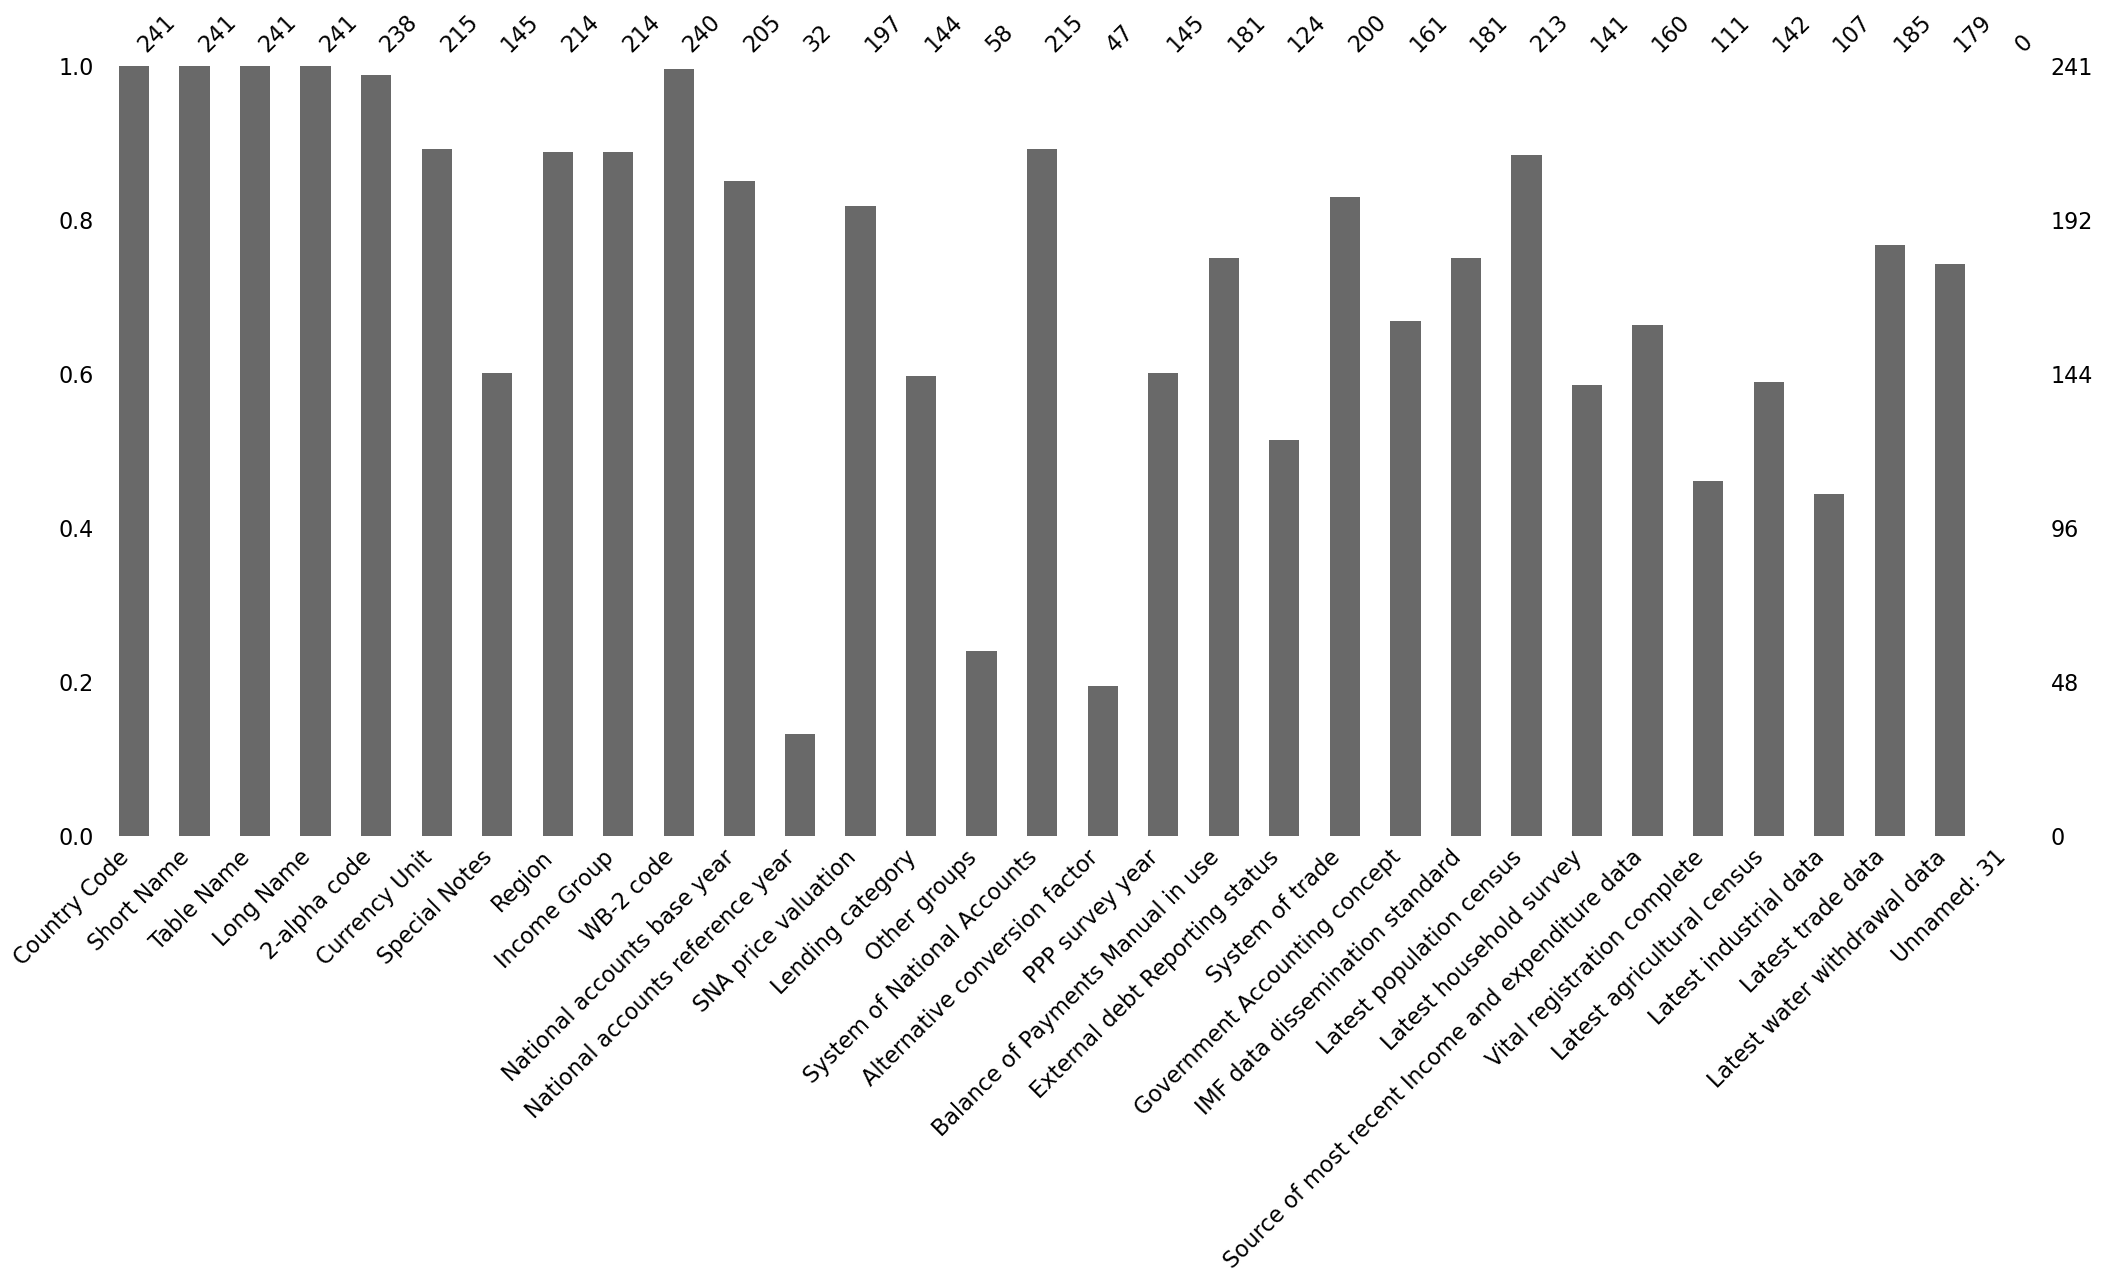

In [11]:
msno.bar(data_EdStatsCountry)

## data_EdStatsCountry_Series

In [12]:
data_EdStatsCountry_Series = pd.read_csv(path+"/EdStatsCountry-Series.csv")
data_EdStatsCountry_Series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [13]:
# Vérification des doublons
doublons(data_EdStatsCountry_Series)

0 doublons


In [14]:
data_EdStatsCountry_Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [15]:
data_first_analyse(data_EdStatsCountry_Series)

C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3460018430.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3460018430.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3460018430.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()


,observations,variables,type,moyennes,medianes,ecart_types,min,max,nb_valeurs_manquantes,%_valeurs_manquantes
CountryCode,613,4,object,NaN,NaN,NaN,ABW,ZWE,0,0.0
DESCRIPTION,613,4,object,NaN,NaN,NaN,Based on official exchange rates.,"Refers to Guernsey, and Jersey.",0,0.0
SeriesCode,613,4,object,NaN,NaN,NaN,NY.GDP.MKTP.PP.CD,SP.POP.TOTL.MA.ZS,0,0.0
Unnamed: 3,613,4,float64,NaN,NaN,NaN,NaN,NaN,613,100.0


Ce dataset ne contient pas de valeur manquante sur les variables: `CountryCode`, `DESCRIPTION`, `SeriesCode`.<br>
La variable `Unnamed: 3	` a 100% de valeurs manquantes.

In [16]:
data_EdStatsCountry_Series.describe(include="O")

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


La variable `CountryCode` est aussi dans le dataset `EdStatsCountry`
ici cette variable a 211 valeur unique or dans le dataset `EdStatsCountry` elle en a 241.

In [17]:
data_EdStatsCountry[~data_EdStatsCountry['Country Code'].isin(data_EdStatsCountry_Series['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')

,Short Name
5,Arab World
47,Curaçao
58,East Asia & Pacific (all income levels)
57,East Asia & Pacific (developing only)
63,Euro area
60,Europe & Central Asia (all income levels)
59,Europe & Central Asia (developing only)
68,European Union
92,Heavily indebted poor countries (HIPC)
89,High income


Cette variable ne contient pas seulement des pays mais aussi:
* les situations économique (Heavily indebted poor countries, Middle income, High income...), 
* des regroupement de regions (East Asia & Pacific , Europe & Central Asia ...)

### Information sur le dataset ``EdStatsCountry``

* Information sur la source des données.

Ce jeu de données ne fournit que des informations sur la source des données, ce qui le rend non pertinent. Nous pouvons donc le mettre de côté.

## data_EdStats

In [18]:
data_EdStats = pd.read_csv(path+"/EdStatsData.csv")
data_EdStats.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
doublons(data_EdStats)

0 doublons


In [20]:
pays_uniques = data_EdStats["Country Name"].unique()
pays_uniques

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [21]:
list_indicator = pays_uniques = data_EdStats["Indicator Name"].unique()
list_indicator

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [22]:
print(f"Nombre de ligne : {data_EdStats.shape[0]} \nNombre de colonnes : {data_EdStats.shape[1]}")

Nombre de ligne : 886930 
Nombre de colonnes : 70


In [23]:
data_EdStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [24]:
data_EdStats.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [25]:
data_EdStats.describe(include="O")

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
freq,3665,3665,242,242


In [26]:
# Moyenne des valeurs manquantes pour chaque colonne
data_EdStats.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

In [27]:
nb_valeurs_manquantes = data_EdStats.isnull().sum()
nb_observations, nb_variables = data_EdStats.shape
summary = pd.DataFrame({
        'observations': nb_observations,
        'variables': nb_variables,
        'nb_valeurs_manquantes': nb_valeurs_manquantes,
        '%_valeurs_manquantes' : round((nb_valeurs_manquantes/nb_observations)*100,2)})
pd.set_option('display.max_rows', None)
summary

,observations,variables,nb_valeurs_manquantes,%_valeurs_manquantes
Country Name,886930,70,0,0.00
Country Code,886930,70,0,0.00
Indicator Name,886930,70,0,0.00
Indicator Code,886930,70,0,0.00
1970,886930,70,814642,91.85
1971,886930,70,851393,95.99
1972,886930,70,851311,95.98
1973,886930,70,851385,95.99
1974,886930,70,851200,95.97
1975,886930,70,799624,90.16


### Information sur le Dataset "EdstatsData"

**Le jeu de données "EdstatsData" comporte une variété d'informations pertinentes pour notre analyse, notamment :**

* Des données sur les pays, comprenant leurs noms et codes, ainsi que l'évolution des indicateurs, y compris leurs noms et codes, sur une période allant de 1970 à 2017 (historique) et de 2020 à 2100 (données prospectives).
Il est important de noter que la colonne `Country Name` ne contient pas uniquement les noms des pays, mais également d'autres libellés tels que des groupes de pays (par exemple, "Arab World").


* En termes de dimensionnalité, le jeu de données se compose de 886 930 lignes et 70 colonnes. Le taux moyen de complétion des données est de 13,9%. Il est également notable qu'il n'y a pas de doublons dans le jeu de données.


* Cependant, il est essentiel de souligner que 86% des valeurs sont manquantes dans ce dataset, ce qui nécessitera une gestion appropriée des données manquantes.


* En observant la structure des données, nous pouvons identifier deux groupes de similitudes : le premier groupe comprend les colonnes `Indicator Code`, `Indicator Name`, `Country Name` et `Country Cod`, tandis que le deuxième groupe contient les colonnes "2017" et "Unnamed: 69".


* La colonne `Unnamed: 20` ne contient aucune donnée exploitable et affiche un taux de 100% de valeurs manquantes.


* D'un point de vue positif, les colonnes `Country Name`, `Country Code`, "Indicator Name" et "Indicator Code" ne présentent aucune valeur manquante.


* En ce qui concerne les données prospectives de 2020 à 2100, elles ne représentent que 5,8% du jeu de données. Par ailleurs, les années 2016 et 2017 sont sous-représentées avec respectivement 0,016% et 1,85% de données disponibles. En revanche, l'année 2010 se distingue avec une disponibilité de données atteignant 27,3%.


* Nous remarquons également un schéma récurrent d'évolution des données tous les 5 ans depuis 1970 jusqu'en 2010.


* Il est important de noter que les données ont été mises à jour en 2021, ce qui correspond à l'année d'étude du projet.


* Cependant, la période de 2016 à 2019 présente très peu de données exploitables et doit être exclue de notre analyse. La période la plus appropriée pour une analyse approfondie s'étend de 2010 à 2015.


* Dans le cadre de notre analyse, nous pouvons conserver ce jeu de données, car il contient des informations sur les noms des pays et l'évolution des indicateurs de 1970 à 2100.


**Préconisations :** 


* Supprimer la colonne `Unnamed: 69` en raison de l'absence de données exploitables.
* Prendre en compte que la période de 2020 à 2100 correspond à des données prospectives.
* Exclure la période de 2016 à 2019 en raison du manque de données exploitables.
* Évaluer la nécessité de nettoyer ou de supprimer la colonne `Country Name` en fonction des besoins spécifiques de l'analyse.

<AxesSubplot:>

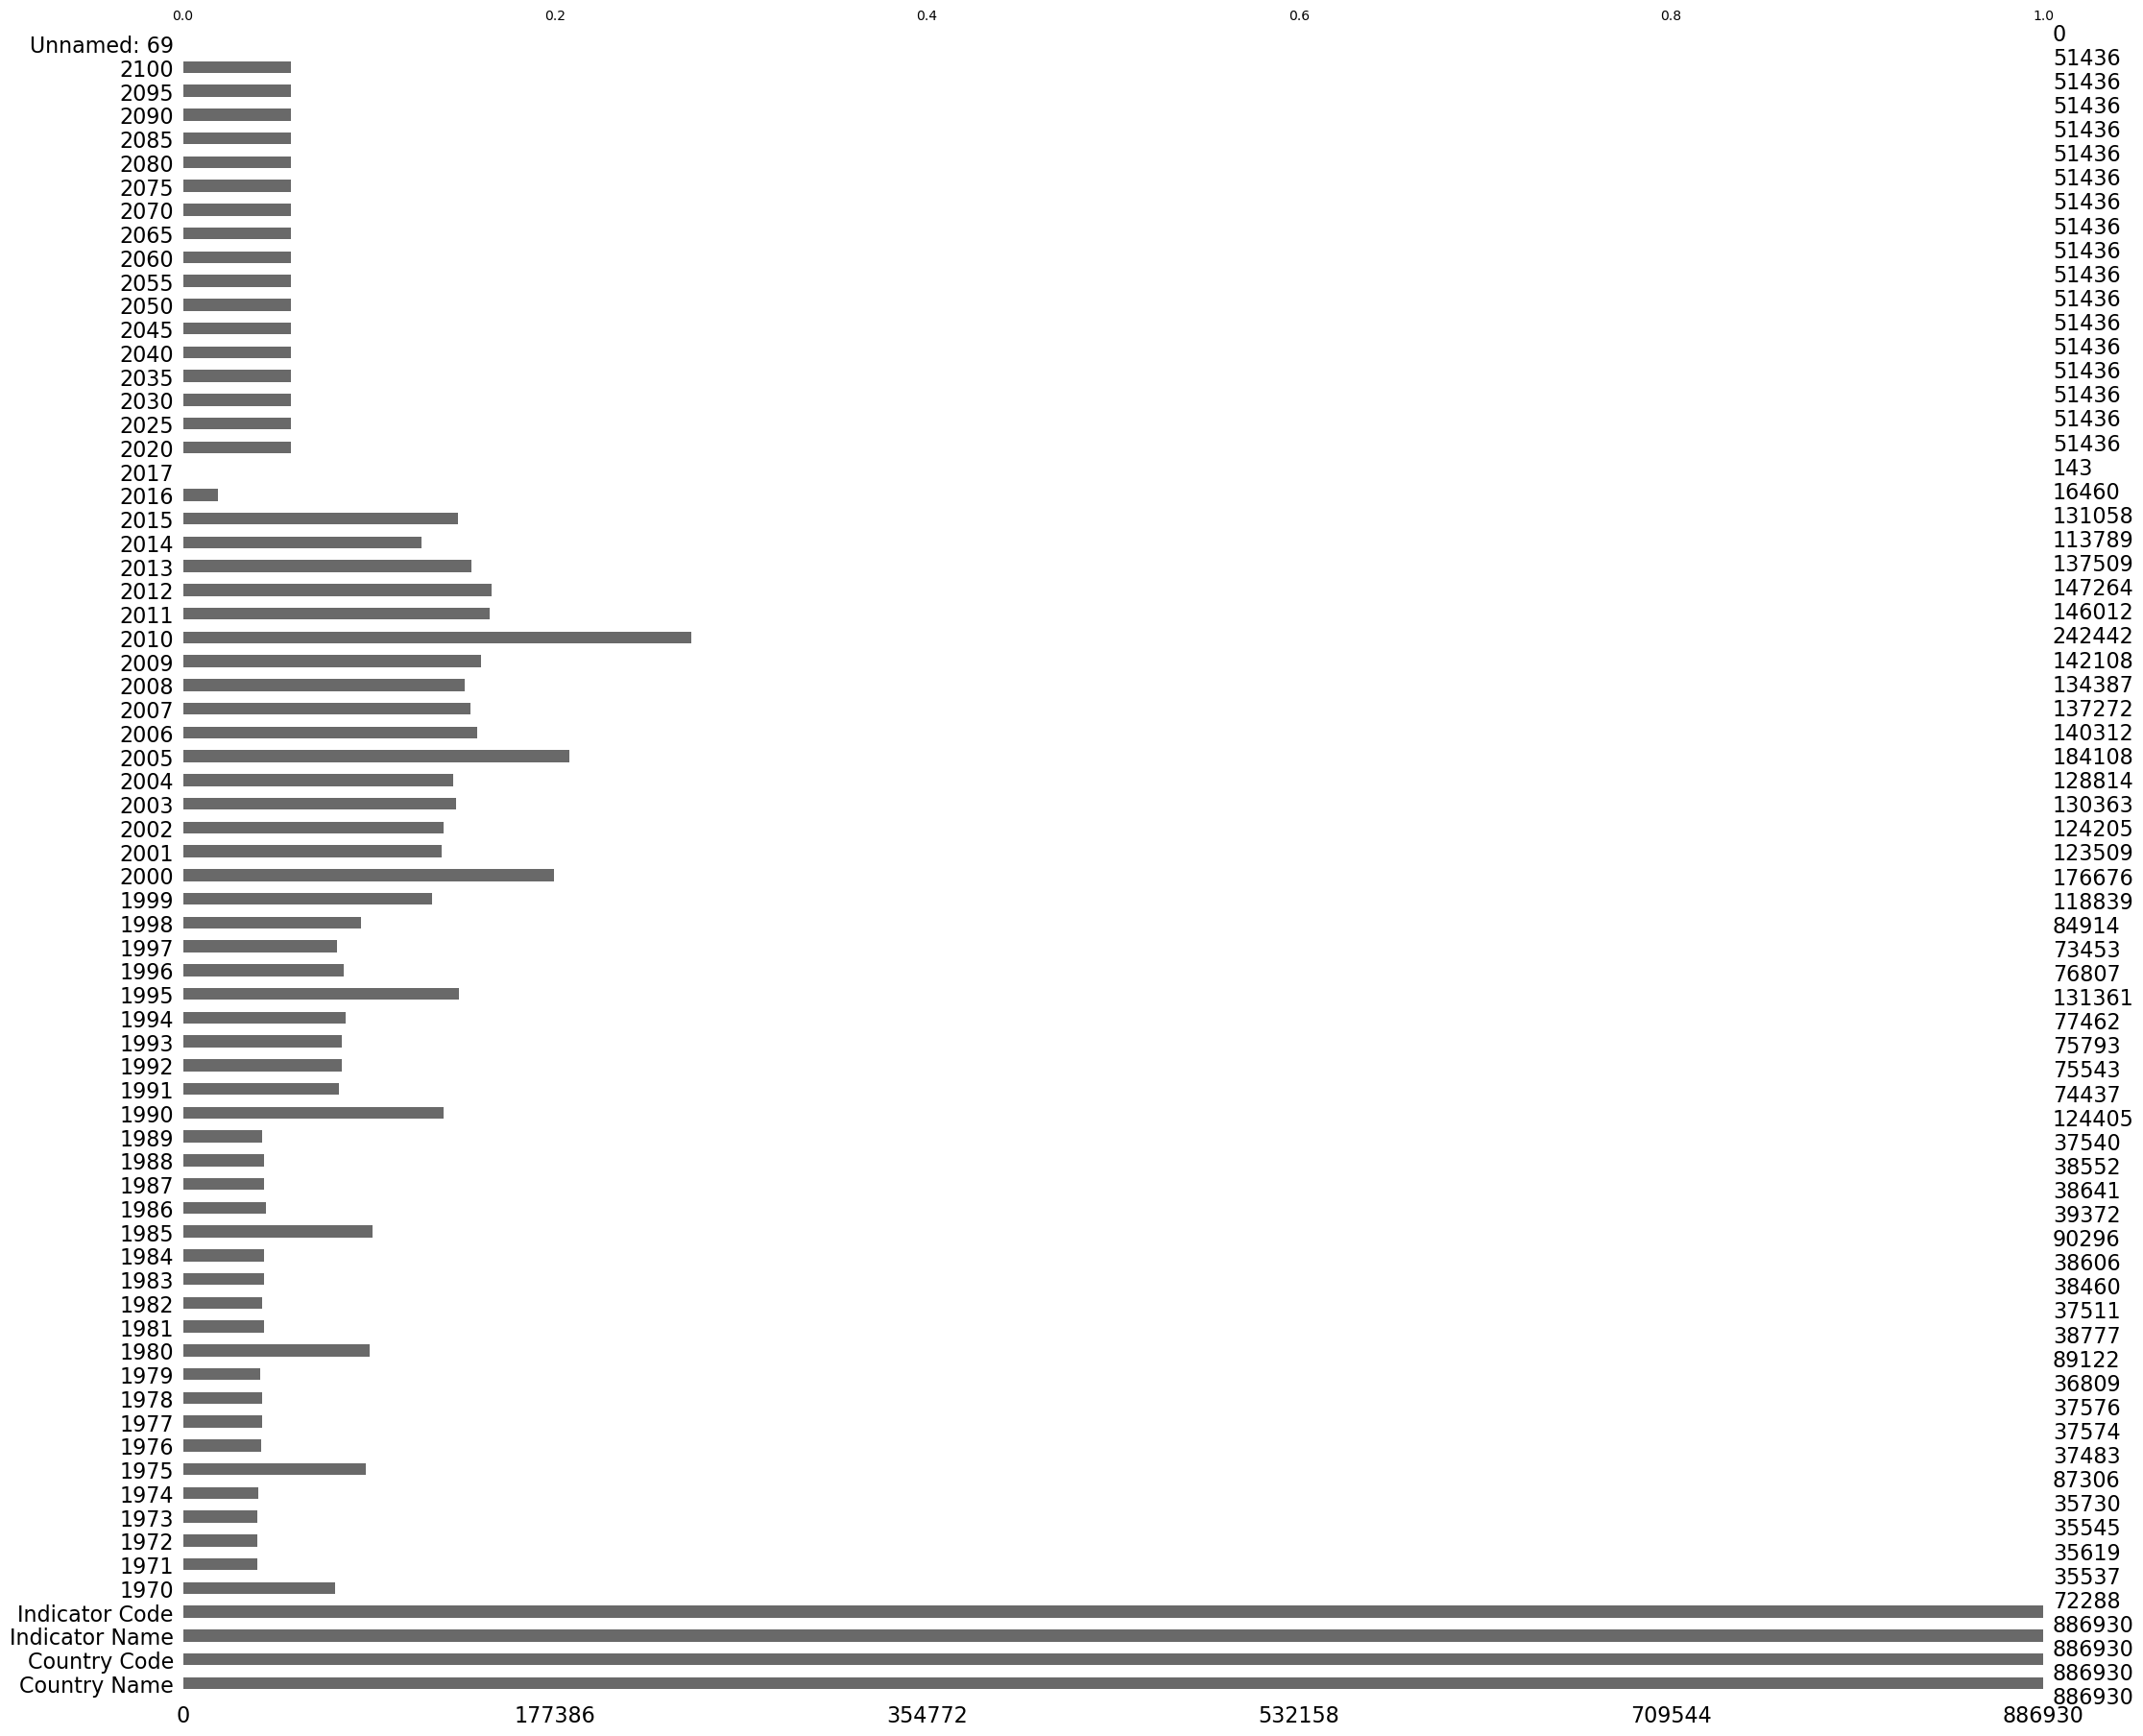

In [28]:
msno.bar(data_EdStats)

## data_EdStatsFootNote

In [29]:
data_EdStatsFootNote = pd.read_csv(path+"/EdStatsFootNote.csv")
data_EdStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [30]:
doublons(data_EdStatsFootNote)

0 doublons


In [31]:
nb_valeurs_manquantes = data_EdStatsFootNote.isnull().sum()
nb_observations, nb_variables = data_EdStatsFootNote.shape
summary = pd.DataFrame({
        'observations': nb_observations,
        'variables': nb_variables,
        'nb_valeurs_manquantes': nb_valeurs_manquantes,
        '%_valeurs_manquantes' : round((nb_valeurs_manquantes/nb_observations)*100,2)})
pd.set_option('display.max_rows', None)
summary

,observations,variables,nb_valeurs_manquantes,%_valeurs_manquantes
CountryCode,643638,5,0,0.0
SeriesCode,643638,5,0,0.0
Year,643638,5,0,0.0
DESCRIPTION,643638,5,0,0.0
Unnamed: 4,643638,5,643638,100.0


In [32]:
print(f"Nombre de ligne : {data_EdStatsFootNote.shape[0]} \nNombre de colonnes : {data_EdStatsFootNote.shape[1]}")

Nombre de ligne : 643638 
Nombre de colonnes : 5


In [33]:
data_EdStatsFootNote.describe(include="O")

,CountryCode,SeriesCode,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,YR2004,Country Data
freq,7320,9226,27128,191188


**Analyse des Variables Catégoriques**

Notre analyse initiale du dataset révèle la présence de variables catégoriques. Il est intéressant de noter que nous observons 239 valeurs uniques dans ce dataset, tandis que le dataset "Country" contient 241 valeurs uniques. Cette observation suggère qu'il y a moins de pays dans ce dataset par rapport au dataset "Country".

L'identification de ces variables catégoriques et la compréhension de la différence dans le nombre de valeurs uniques sont des éléments cruciaux pour notre analyse ultérieure. Il serait pertinent d'explorer davantage ces variables pour en extraire des informations significatives dans le cadre de notre étude.

In [34]:
# On cherche à identifier les variables qui partagent des valeurs communes (renvoyant "True"),
# puis nous examinerons celles qui renvoient "False" (correspondant aux pays manquants).
variables_partagees = data_EdStatsCountry["Country Code"].isin(data_EdStatsFootNote["CountryCode"])

# Inversion du masque pour obtenir les pays manquants.
pays_manquants = ~variables_partagees

# Affichage des noms des pays manquants triés par ordre décroissant.
pays_manquants_df = data_EdStatsCountry[pays_manquants][["Short Name"]].sort_values(by="Short Name", ascending=False)

# Affichage du DataFrame contenant les noms des pays manquants.
print(pays_manquants_df)

                    Short Name
134   St. Martin (French part)
207  Sint Maarten (Dutch part)
85                   Greenland


### Information sur le Dataset "EdstatsFootNote"

Le jeu de données "EdstatsFootNote" fournit des informations essentielles, notamment le code pays, le code indicateur, l'année et une description associée.

Plus spécifiquement, il contient des descriptions liées aux estimations du pays, des données du pays, des limites d'incertitude et l'année correspondante. En analysant ce jeu de données, les points suivants se dégagent :

* Il compte 643 638 lignes et 5 colonnes.
* Aucun doublon n'a été identifié.
* Le jeu de données présente un taux de remplissage moyen de 80%.
* Toutefois, il est important de noter qu'il y a 20% (643 638 sur 3 218 190) de valeurs manquantes dans ce dataset.
* La colonne "Unnamed:31" ne contient aucune donnée exploitable, elle concentre l'intégralité des valeurs manquantes, soit 100%.

En examinant les variables catégoriques, une observation significative se dégage : dans la colonne `Country Code` du dataset `EdstatsCountry`, nous relevons 241 valeurs uniques, tandis que dans la colonne `Country Code` du dataset `EdstatsFootNote`, nous en trouvons seulement 239. Cela indique qu'il manque deux codes pays dans le dataset `EdstatsFootNote` par rapport au dataset `EdstatsCountry`.

Dans le contexte de notre analyse, ce jeu de données ne semble pas apporter de valeur pertinente et peut donc être écarté.

**Préconisations si utilisation: **

* Supprimer la colonne `Unnamed:3` en raison de l'absence de données exploitables.
* Mettre en évidence les intitulés des codes pays manquants dans le jeu de données `EdstatsFootNote`.

## data_EdStatsSeries

In [35]:
data_EdStatsSeries = pd.read_csv(path+"/EdStatsSeries.csv")
data_EdStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
doublons(data_EdStatsSeries)

0 doublons


In [37]:
data_EdStatsSeries["Topic"].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [38]:
nb_valeurs_manquantes = data_EdStatsSeries.isnull().sum()
nb_observations, nb_variables = data_EdStatsSeries.shape
type_var = data_EdStatsSeries.dtypes
summary = pd.DataFrame({
        'observations': nb_observations,
        'variables': nb_variables,
        'nb_valeurs_manquantes': nb_valeurs_manquantes,
        '%_valeurs_manquantes' : round((nb_valeurs_manquantes/nb_observations)*100,2),
        'd_types' : type_var})
pd.set_option('display.max_rows', None)
summary

,observations,variables,nb_valeurs_manquantes,%_valeurs_manquantes,d_types
Series Code,3665,21,0,0.00,object
Topic,3665,21,0,0.00,object
Indicator Name,3665,21,0,0.00,object
Short definition,3665,21,1509,41.17,object
Long definition,3665,21,0,0.00,object
Unit of measure,3665,21,3665,100.00,float64
Periodicity,3665,21,3566,97.30,object
Base Period,3665,21,3351,91.43,object
Other notes,3665,21,3113,84.94,object
Aggregation method,3665,21,3618,98.72,object


### Analyse Préliminaire du DataFrame "data_EdStatsSeries"

Le DataFrame ``data_EdStatsSeries`` présente les caractéristiques suivantes :

* **Nombre d'Observations :** Le DataFrame contient 3 665 lignes, ce qui signifie qu'il y a 3 665 enregistrements ou entrées dans ce jeu de données.


* **Nombre de Variables :** Il comporte 21 variables, chacune correspondant à une colonne distincte du jeu de données.


* **Nombre de Valeurs Manquantes :** Les valeurs manquantes sont présentes dans plusieurs colonnes du DataFrame, avec un pourcentage de valeurs manquantes allant de 0% à 100%.


* **Types de Données :** Les données sont de types variés, principalement de type "object" pour les variables textuelles, et de type "float64" pour certaines variables numériques.


**Les principales observations sont les suivantes :**

* `Series Code` : Cette variable présente 1 509 valeurs manquantes, soit 41,17% de son contenu.


* `Unit of Measure` : Cette variable est de type numérique (float64), mais elle présente 100% de valeurs manquantes.


* `Periodicity`, `Base Period`, `Aggregation Method`, `Limitations and Exceptions`, `Notes from Original Source`, `General Comments`, `Statistical Concept and Methodology`, `Development Relevance`, `Related Source Links`,`License Type`, `Unnamed: 20` : Ces variables présentent un pourcentage élevé de valeurs manquantes, allant de 91,43% à 100%, ce qui indique que la plupart des données dans ces colonnes sont manquantes.


* `Séries Code`, `Topic`, `Indicator Name`, `Long Definition`, `Source` : Ces variables ne présentent aucune valeur manquante.


En conclusion, le DataFrame "data_EdStatsSeries" est principalement composé de variables textuelles pertinentes, telles que Topic, Indicator Name, Long Definition, et Source, qui ne contiennent aucune valeur manquante. Cependant, certaines variables numériques et textuelles présentent un pourcentage élevé de valeurs manquantes, ce qui nécessitera une gestion appropriée des données manquantes lors de l'analyse ultérieure.

<AxesSubplot:>

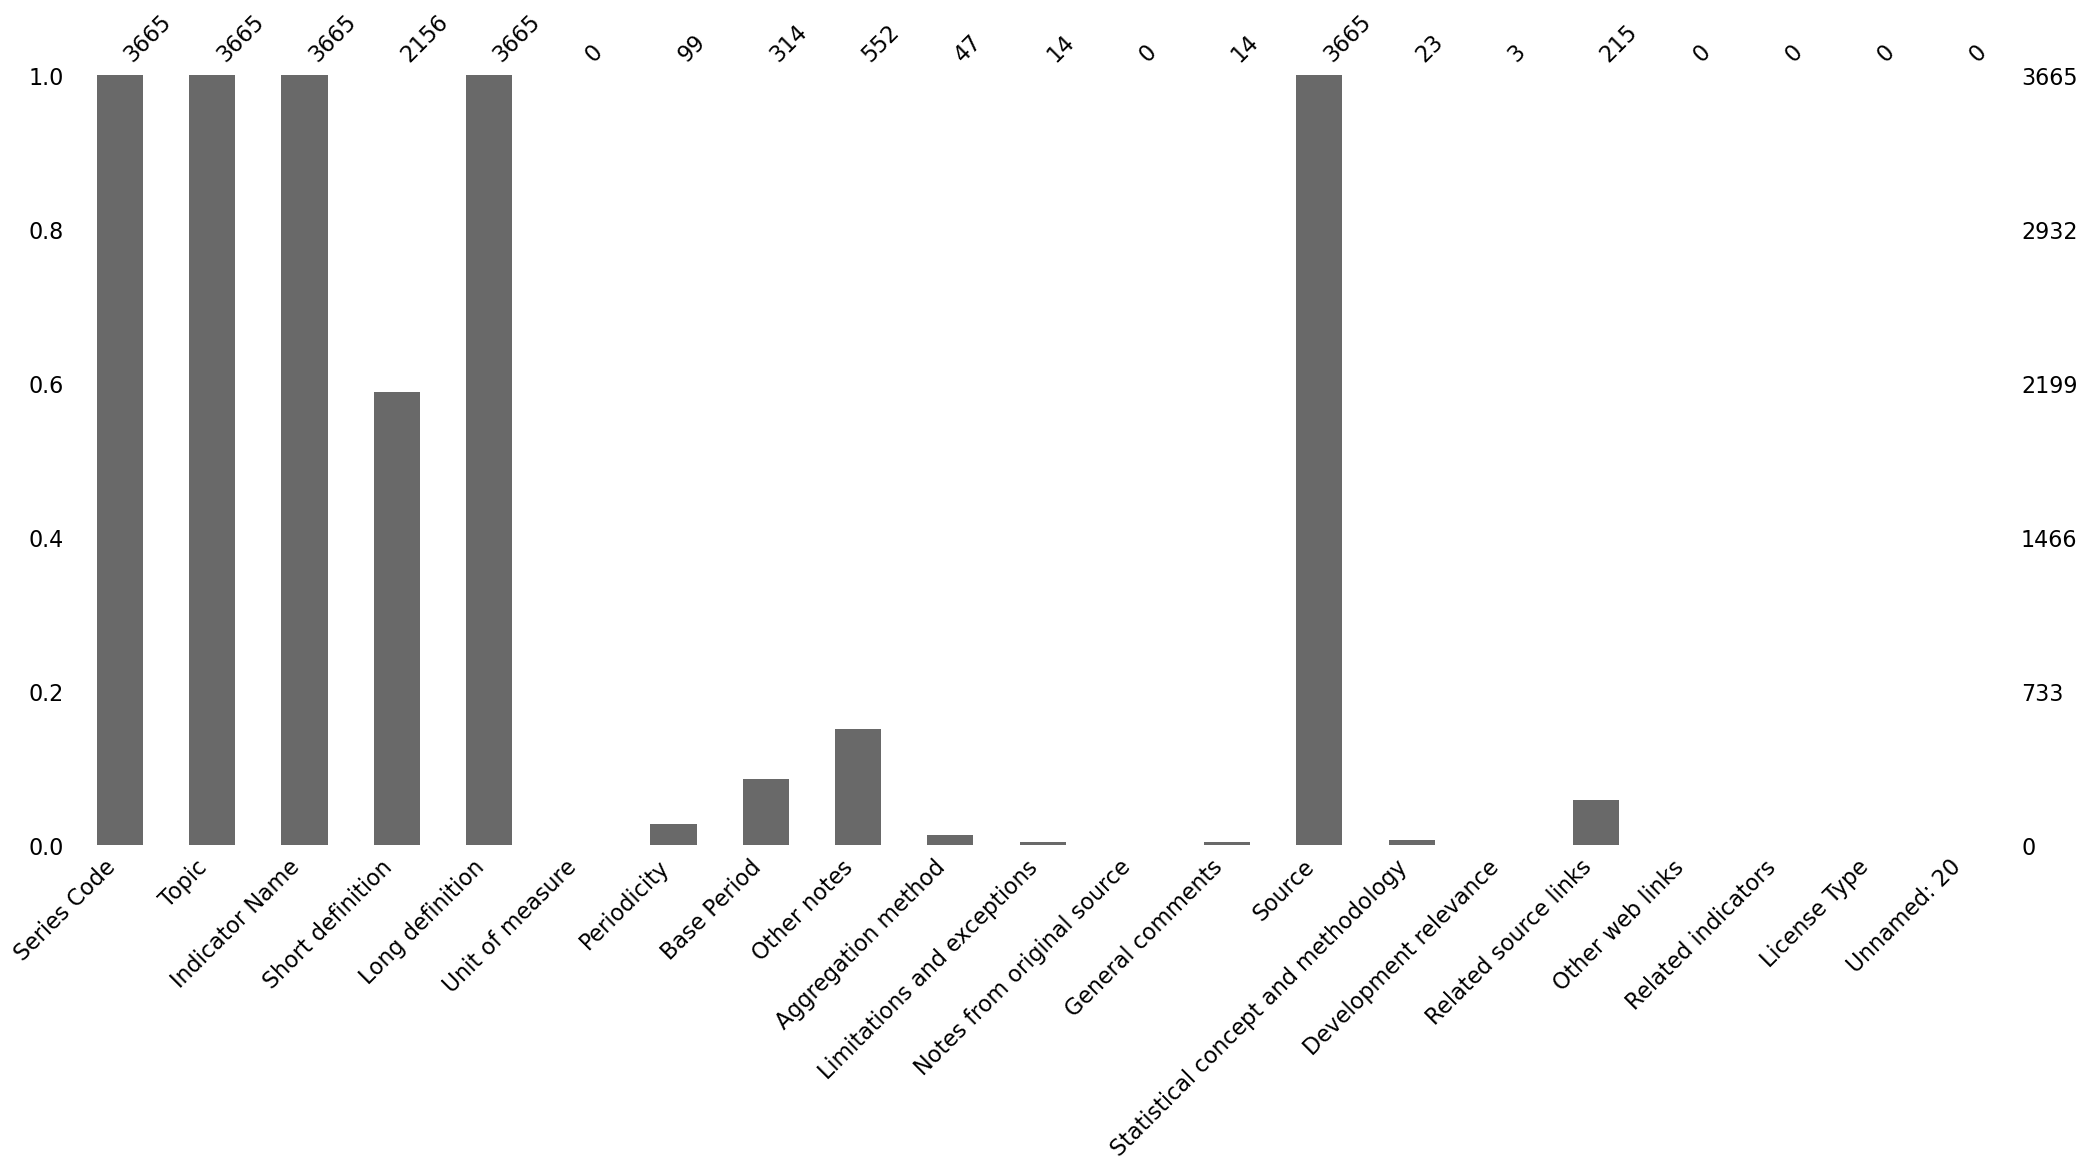

In [39]:
msno.bar(data_EdStatsSeries)

# 2) Description du jeu de données :<a class="anchor" id="2"></a>

[Retour au sommaire](#sommaire)

Au sein de notre démarche analytique, nous envisageons de conserver certains jeux de données qui présentent une valeur substantielle pour notre analyse.

Le jeu de données `EdStatsData` mérite d'être préservé puisqu'il renferme des renseignements essentiels concernant les pays, leurs noms, ainsi que l'évolution des indicateurs au fil des années, couvrant la période allant de 1970 à 2100.
* `EdStatsData` se compose de **886 930 lignes** et **70 colonnes**. Le taux moyen de complétion des données est de 13,9%. Il est également notable qu'il n'y a pas de doublons dans le jeu de données.

Le jeu de données `EdstatsCountry` se révèle également pertinent dans le contexte de notre analyse. Il comporte des données exhaustives sur les noms des pays, leurs régions, leur appartenance à des groupes de revenus, ainsi que des informations relatives à leurs systèmes économiques.
* `EdstatsCountry` se compose de **241 lignes** et **32 colonnes**;

De manière similaire, le jeu de données `EdstatsSeries` présente une valeur substantielle puisqu'il contient des indicateurs, leurs sujets et leurs définitions, fournissant ainsi un cadre essentiel pour notre analyse.
* `EdstatsSeries` se compose de **3665 lignes** et **21 colonnes**

En revanche, les jeux de données <span style="color:red;">EdstatsCountry-Series</span> et <span style="color:red;">EdstatsFootNote</span> sont exclus de notre analyse en raison de leur moindre pertinence et de leur apport limité à nos objectifs d'analyse.

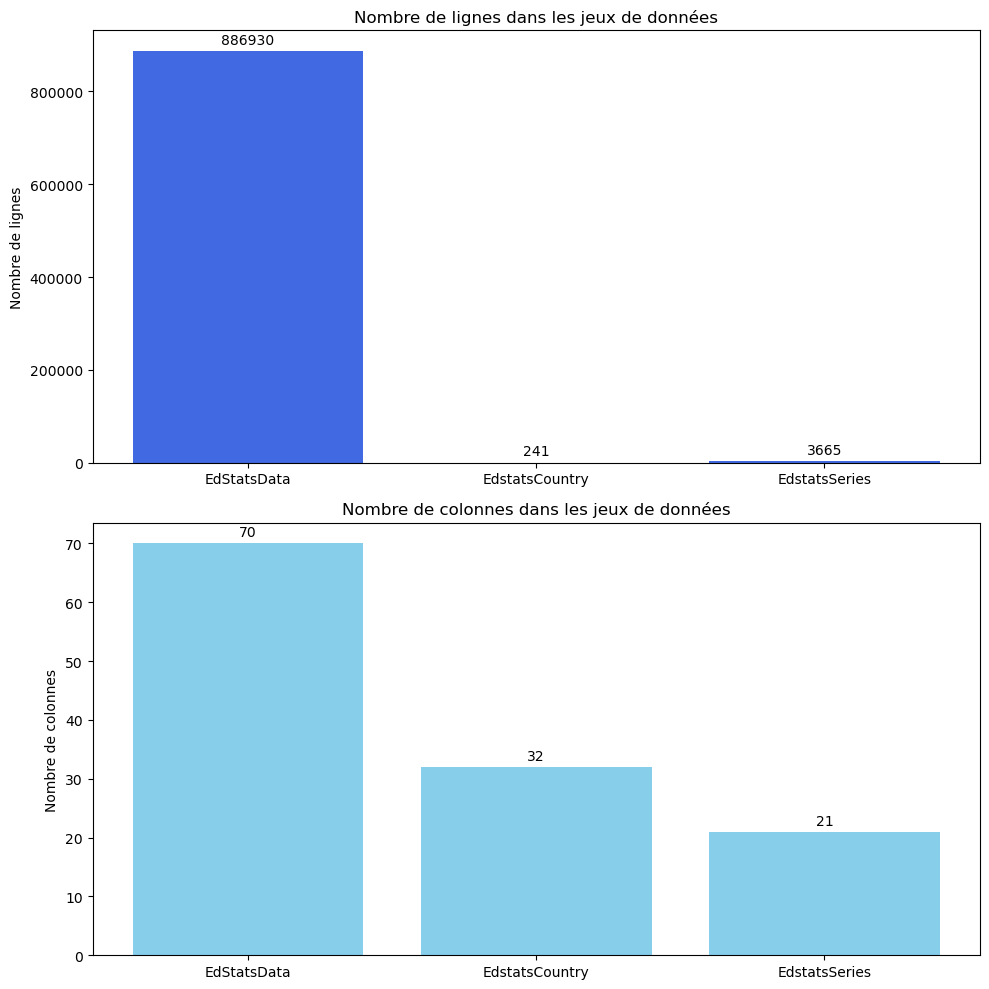

In [40]:
import matplotlib.pyplot as plt

# Données des jeux de données
jeux_de_donnees = ["EdStatsData", "EdstatsCountry", "EdstatsSeries"]
nb_lignes = [886930, 241, 3665]
nb_colonnes = [70, 32, 21]
taux_completion = [13.9, 100, 100]

# Créer une figure avec deux sous-graphiques (un pour les lignes, un pour les colonnes)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Graphique pour le nombre de lignes
bar1 = ax1.bar(jeux_de_donnees, nb_lignes, color='royalblue')
ax1.set_ylabel('Nombre de lignes')
ax1.set_title('Nombre de lignes dans les jeux de données')

# Ajouter les nombres au-dessus des barres pour le nombre de lignes
for rect in bar1:
    height = rect.get_height()
    ax1.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

# Graphique pour le nombre de colonnes
bar2 = ax2.bar(jeux_de_donnees, nb_colonnes, color='skyblue')
ax2.set_ylabel('Nombre de colonnes')
ax2.set_title('Nombre de colonnes dans les jeux de données')

# Ajouter les nombres au-dessus des barres pour le nombre de colonnes
for rect in bar2:
    height = rect.get_height()
    ax2.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


# 3) Sélection des informations pertinentes :<a class="anchor" id="3"></a>

[Retour au sommaire](#sommaire)

Pour répondre à la problématique de l'entreprise concernant **l'expansion vers de nouveaux pays**, nous allons nous concentrer sur les indicateurs suivants :

**Pour la population visée (niveau lycée et université) :**

* tranche d'age visée 15-24

**Pour les aspects économiques :**

* GNI per capita, PPP (current international dollar) : Cet indicateur nous permettra d'évaluer le niveau de richesse par habitant dans les différents pays.

**Pour l'éducation :**

* Taux de scolarisation pour le niveau lycée et universitaire.
* Pourcentage d'élèves diplômés au niveau lycée et universitaire.

**Pour les moyens techniques :**

* des  indicateurs qui nous donne une idée de la disponibilité et de l'utilisation d'Internet, ce qui peut être important pour l'expansion de l'entreprise.

In [41]:
# Liste de tout les indicateurs 
indicator=data_EdStats['Indicator Name'].unique()
nb_indicator=len(indicator)
country_=data_EdStats['Country Name'].unique()
nb_country=len(country_)


print('Nombre d indicateurs : ')
print(nb_indicator)
print('Nombre de pays : ')
print(nb_country)

nb_country*nb_indicator==data_EdStats.shape[0]
indicator.tolist()

Nombre d indicateurs : 
3665
Nombre de pays : 
242


['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

In [42]:
# Définissez le nom du fichier texte de sortie
nom_fichier = "liste_indicateurs.txt"

# Ouvrez le fichier en mode écriture
with open(nom_fichier, "w") as fichier:
    # Écrivez chaque indicateur dans une ligne du fichier
    for indicateur in indicator:
        fichier.write(indicateur + "\n")

print("La liste des indicateurs a été enregistrée dans", nom_fichier)

La liste des indicateurs a été enregistrée dans liste_indicateurs.txt


In [43]:
# Liste des indicateurs à exclure
deleted_indicators = ['male',
                        'Male',
                        'Female',
                        'female',
                        'Rural',
                        'Urban',
                        'primary',
                        'Primary',
                        'non-tertiary',
                        'Teacher',
                        'SABER',
                        'EGRA',
                        'PIAAC',
                        'PISA',
                        'LLECE',
                        'PASEC',
                        'TIMSS',
                        'SACMEQ',
                        'PIRLS']

# Créer une liste des indicateurs pertinents en excluant ceux à supprimer
indicators_pertinents = [indicator for indicator in data_EdStats['Indicator Name'].unique() if all(exclude_indicator not in indicator for exclude_indicator in deleted_indicators)]

# Créer un DataFrame avec les indicateurs pertinents
data_irrelevent_indicators = data_EdStats[data_EdStats['Indicator Name'].isin(indicators_pertinents)]

print(f"Nombre d'indicateur : {len(data_irrelevent_indicators['Indicator Name'].unique().tolist())}")
data_irrelevent_indicators['Indicator Name'].unique().tolist()


Nombre d'indicateur : 693


['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adult illiterate population, 15+ years, both sexes (number)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Adult literacy rate, population 15+ years, gender parity index (GPI)',
 'Africa Dataset: Graduates from accredited pre-service lower secondary teacher training programmes, both sexes (number)',
 'Africa Dataset: Graduates from accredited pre-service teacher training programmes, level unspecified, both sexes (number)',
 'Africa Dataset: Graduates from accredited pre-service upper secondary teacher training programmes, both sexes (number)',
 'Africa Dataset: Percentage of lower secondary schools with access to electricity (%)',
 'Africa Dataset: Percentage of lower secondary schools wi

In [44]:
indicator_list_deleted = data_irrelevent_indicators['Indicator Name'].unique().tolist()

# Définissez le nom du fichier texte de sortie
nom_fichier = "liste_indicateurs_deleted.txt"

# Ouvrez le fichier en mode écriture
with open(nom_fichier, "w") as fichier:
    # Écrivez chaque indicateur dans une ligne du fichier
    for indicateur in indicator_list_deleted:
        fichier.write(indicateur + "\n")

print("La liste des indicateurs pertinents a été enregistrée dans", nom_fichier)

La liste des indicateurs pertinents a été enregistrée dans liste_indicateurs_deleted.txt


## Nos potentiels indicateurs

In [45]:
# Liste des indicateurs restants
indicateurs_restants = indicator_list_deleted

# Liste des indicateurs à filtrer
# Indicateurs potentiels que nous souhaitons sélectionner
indicators_potential = ['GDP', 'age 15-19', 'age 20-24', 'Population, ages 15-24, total',
                        'Population of the official age for secondary education, both sexes (number)',
                        'Population of the official age for tertiary education, both sexes (number)',
                        'computers', 'Gross enrolment ratio, secondary, both sexes (%)',
                        'Gross enrolment ratio, secondary, gender parity index (GPI)',
                        'Gross enrolment ratio, tertiary, both sexes (%)',
                        'Gross enrolment ratio, tertiary, gender parity index (GPI)',
                        'DHS: Secondary completion rate',
                        'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
                        'Internet users']

# Filtrer les indicateurs qui sont dans la liste indicators_potential
indicators_pertinents = [indicator for indicator in indicateurs_restants if any(ind in indicator for ind in indicators_potential)]

# Créer un DataFrame avec les indicateurs pertinents
data_potential_indicators = data_EdStats[data_EdStats['Indicator Name'].isin(indicators_pertinents)]

print(len(data_potential_indicators['Indicator Name'].unique().tolist()))
data_potential_indicators['Indicator Name'].unique().tolist()


68


['Barro-Lee: Average years of secondary schooling, age 15-19, total',
 'Barro-Lee: Average years of secondary schooling, age 20-24, total',
 'Barro-Lee: Average years of tertiary schooling, age 15-19, total',
 'Barro-Lee: Average years of tertiary schooling, age 20-24, total',
 'Barro-Lee: Average years of total schooling, age 15-19, total',
 'Barro-Lee: Average years of total schooling, age 20-24, total',
 'Barro-Lee: Percentage of population age 15-19 with no education',
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary',
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)',
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary',
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
 'Barro-Lee: Percentage of population age 20-24 with no education',
 'Barro-Lee: Percentage of p

**Pour affiner est continuer notre analyse nous devons faire des jointures**

* Jointure des tables `data_potential_indicators` et `data_EdStatsCountry`

In [46]:
data_potential_indicators.sample()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
265221,Cote d'Ivoire,CIV,"Gross enrolment ratio, tertiary, gender parity...",SE.ENR.TERT.FM.ZS,NaN,0.18465,0.19453,0.20047,0.21295,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data_EdStatsCountry.sample()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
75,GBR,United Kingdom,United Kingdom,United Kingdom of Great Britain and Northern I...,GB,Pound sterling,NaN,Europe & Central Asia,High income: OECD,GB,...,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 1999",Yes,2010,2009.0,2012.0,2007,NaN


In [48]:
# renamed column:
data_EdStatsCountry = data_EdStatsCountry.rename(columns = {
    "Country Code":         "country_code",
    "Region":               "region",
    "Income Group":         "income_group"
})

data_potential_indicators = data_potential_indicators.rename(columns = {
    "Country Code":          "country_code",
    "Indicator Code":        "indicator_code",
    "Indicator Name":        "indicator_name",
    "Country Name":          "country_name"
})

In [49]:
#column_EdStatsCountry = ['country_code','region','income_group']
data_country_filter = data_EdStatsCountry[['country_code','region','income_group']]
data_potential_indicators = data_potential_indicators.merge(data_country_filter,on='country_code',how='left')
data_potential_indicators.sample()

,country_name,country_code,indicator_name,indicator_code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,region,income_group
13960,St. Kitts and Nevis,KNA,DHS: Secondary completion rate. Quintile 2,HH.DHS.SCR.Q2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income: nonOECD


In [50]:
data_potential_indicators.drop('Unnamed: 69', inplace=True, axis=1)
data_potential_indicators.sample()

,country_name,country_code,indicator_name,indicator_code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,region,income_group
14358,Swaziland,SWZ,Barro-Lee: Percentage of population age 15-19 ...,BAR.TER.ICMP.1519.ZS,0.15,NaN,NaN,NaN,NaN,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income


In [51]:
print(f"Nombre d'indicateurs : {len(data_potential_indicators['indicator_name'].unique())}")
print(f"Nombre de Pays : {len(data_potential_indicators['country_name'].unique())}")

Nombre d'indicateurs : 68
Nombre de Pays : 242


* Jointure des tables `data_potential_indicators` et `data_EdStatsSeries`

In [52]:
# renamed column:
data_EdStatsSeries = data_EdStatsSeries.rename(columns = {
    "Topic":         "topic",
    "Indicator Name":               "indicator_name",
})

In [53]:
data_EdStatsSeries.sample()

,Series Code,topic,indicator_name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
187,BAR.SEC.CMPT.2529.ZS,Attainment,Barro-Lee: Percentage of population age 25-29 ...,Percentage of population age 25-29 with second...,Percentage of population age 25-29 with second...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
column_EdStatsSeries = ['topic','indicator_name']
data_EdStatsSeries_filter = data_EdStatsSeries[column_EdStatsSeries]
data_academy = data_potential_indicators.merge(data_EdStatsSeries_filter,on='indicator_name',how='left')

data_academy.sample()

,country_name,country_code,indicator_name,indicator_code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,region,income_group,topic
12067,Paraguay,PRY,"GDP, PPP (constant 2011 international $)",NY.GDP.MKTP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,Lower middle income,Economic Policy & Debt: Purchasing power parity


In [55]:
print(f"Nombre de topic : {len(data_academy['topic'].unique())}")

Nombre de topic : 10


In [56]:
list_topic = data_academy['topic'].unique()
list_topic

array(['Attainment', 'Education Equality', 'Tertiary', nan,
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity', 'Expenditures',
       'Secondary', 'Infrastructure: Communications', 'Population'],
      dtype=object)

In [57]:
# Liste des topics souhaités
topics_souhaites = ["Attainment",
                    "Education Equality",
                    "Tertiary",
                    "Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators",
                    "Secondary", "Population", "Infrastructure: Communications"]

# Filtrer le DataFrame pour ne conserver que les lignes avec les topics souhaités
data_academy = data_academy[data_academy['topic'].isin(topics_souhaites)]

# Obtenir la liste des noms des indicateurs correspondants
noms_des_indicateurs = data_academy['indicator_name'].unique()

# Afficher la liste des noms des indicateurs correspondants
print(len(noms_des_indicateurs))
print(noms_des_indicateurs)

35
['Barro-Lee: Average years of secondary schooling, age 15-19, total'
 'Barro-Lee: Average years of secondary schooling, age 20-24, total'
 'Barro-Lee: Average years of tertiary schooling, age 15-19, total'
 'Barro-Lee: Average years of tertiary schooling, age 20-24, total'
 'Barro-Lee: Average years of total schooling, age 15-19, total'
 'Barro-Lee: Average years of total schooling, age 20-24, total'
 'Barro-Lee: Percentage of population age 15-19 with no education'
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary'
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)'
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary'
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary)'
 'Barro-Lee: Percentage of population age 20-24 with no education'
 'Barro-Lee: Percentage of population

<AxesSubplot:>

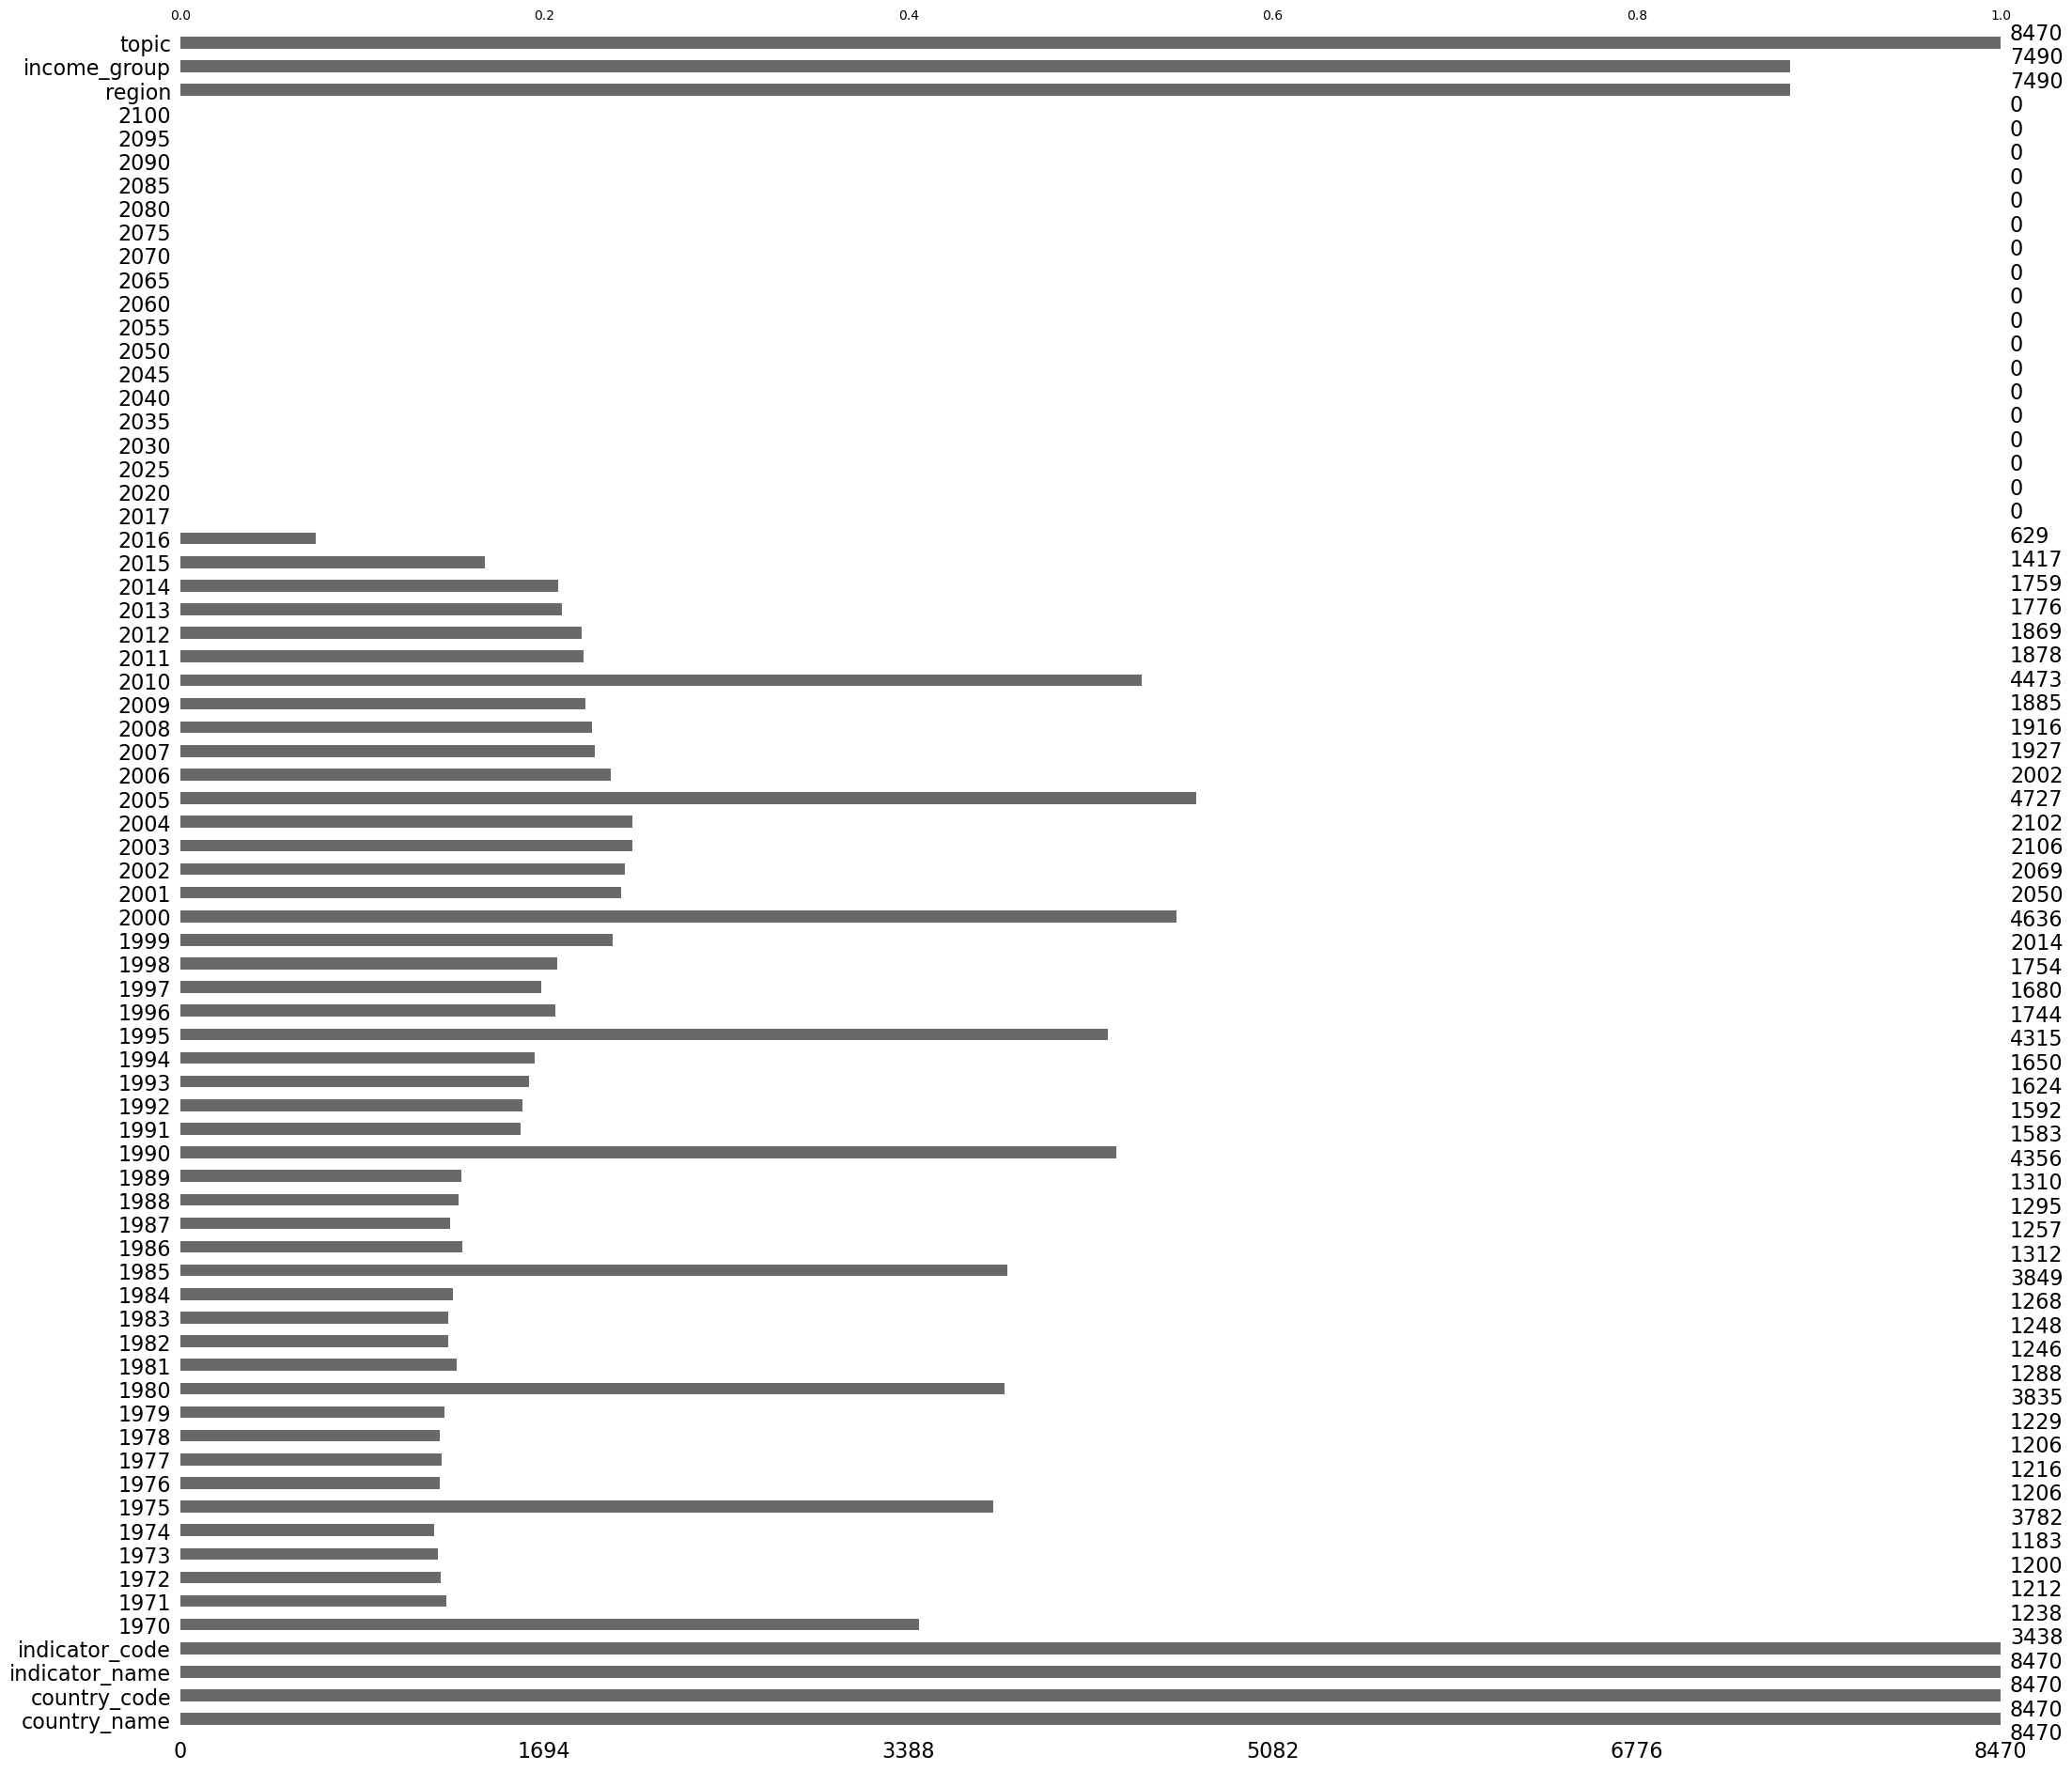

In [58]:
msno.bar(data_academy)

Il y sur le graphique beaucoup de valeurs manquantes au niveau des dates, nous allons donc suprimer les dates de 2016 à 2100 pour faciliter notre analyse.

In [59]:
columns_to_drop = [str(year) for year in range(1970, 2000)] + [str(year) for year in range(2016, 2101)]
columns_to_drop = [col for col in columns_to_drop if col in data_academy.columns]

data_academy_clean = data_academy.drop(columns=columns_to_drop)
data_academy_clean.sample()

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,region,income_group,topic
5009,Croatia,HRV,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,32.381599,35.133018,37.913971,40.761372,42.045952,44.752491,...,49.148281,54.672321,58.17231,61.66721,66.955032,69.544151,69.05249,Europe & Central Asia,High income: nonOECD,Tertiary


In [60]:
data_academy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8470 entries, 0 to 16439
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    8470 non-null   object 
 1   country_code    8470 non-null   object 
 2   indicator_name  8470 non-null   object 
 3   indicator_code  8470 non-null   object 
 4   2000            4636 non-null   float64
 5   2001            2050 non-null   float64
 6   2002            2069 non-null   float64
 7   2003            2106 non-null   float64
 8   2004            2102 non-null   float64
 9   2005            4727 non-null   float64
 10  2006            2002 non-null   float64
 11  2007            1927 non-null   float64
 12  2008            1916 non-null   float64
 13  2009            1885 non-null   float64
 14  2010            4473 non-null   float64
 15  2011            1878 non-null   float64
 16  2012            1869 non-null   float64
 17  2013            1776 non-null   

<AxesSubplot:>

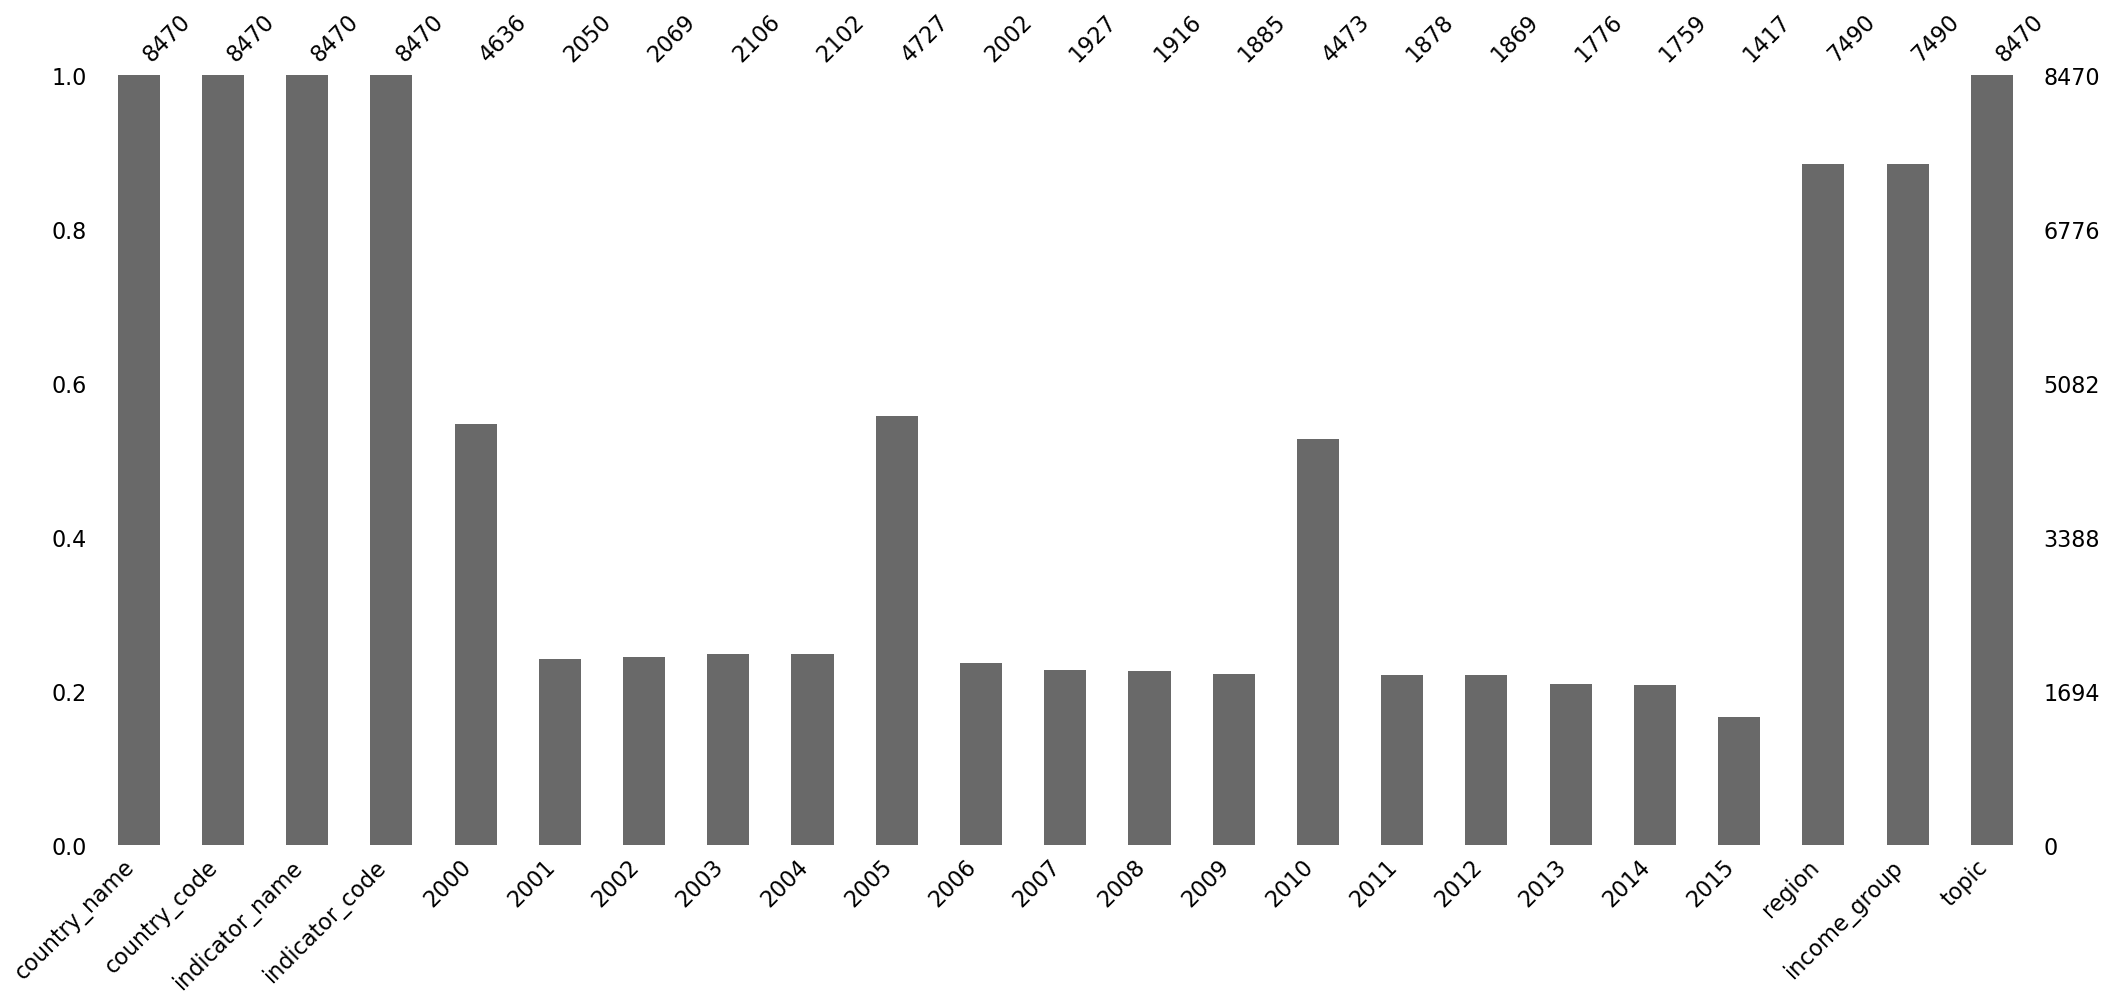

In [61]:
msno.bar(data_academy_clean)

# 4) Calcul des indicateurs statistiques :<a class="anchor" id="4"></a>

[Retour au sommaire](#sommaire)

Nous allons maintenant créer une nouvelle colonne `fill_rate` dans le DataFrame `data_academy_clean`, où chaque ligne contient le pourcentage de valeurs non manquantes par rapport au nombre total de colonnes. Cela peut être interprété comme le "taux de remplissage" de chaque ligne en pourcentage.

In [62]:
# Calculer le nombre total de colonnes dans le DataFrame
nb_col = len(data_academy_clean.columns)

# Créer une nouvelle colonne "fill_rate_percent" contenant le taux de remplissage par ligne en pourcentage
data_academy_clean['fill_rate_percent'] = data_academy_clean.apply(lambda x: (x.notna().sum() / nb_col * 100), axis=1)
data_academy_clean.sample(3)

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,region,income_group,topic,fill_rate_percent
837,Low & middle income,LMY,DHS: Secondary completion rate. Quintile 3,HH.DHS.SCR.Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education Equality,21.739130
8277,Jamaica,JAM,Population of the official age for secondary e...,SP.SEC.TOTL.IN,264863.00,266222.0,266930.0,268393.0,270214.0,271977.0,...,280496.00,280768.0,278410.0,274868.0,269703.0,262096.0,Latin America & Caribbean,Upper middle income,Population,100.000000
6193,Finland,FIN,"Barro-Lee: Average years of total schooling, a...",BAR.SCHL.2024,10.63,NaN,NaN,NaN,NaN,10.8,...,11.55,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: OECD,Attainment,43.478261


In [63]:
data_academy_clean['fill_rate_percent'].describe().T

count    8470.000000
mean       49.238745
std        25.606187
min        21.739130
25%        30.434783
50%        43.478261
75%        52.173913
max       100.000000
Name: fill_rate_percent, dtype: float64

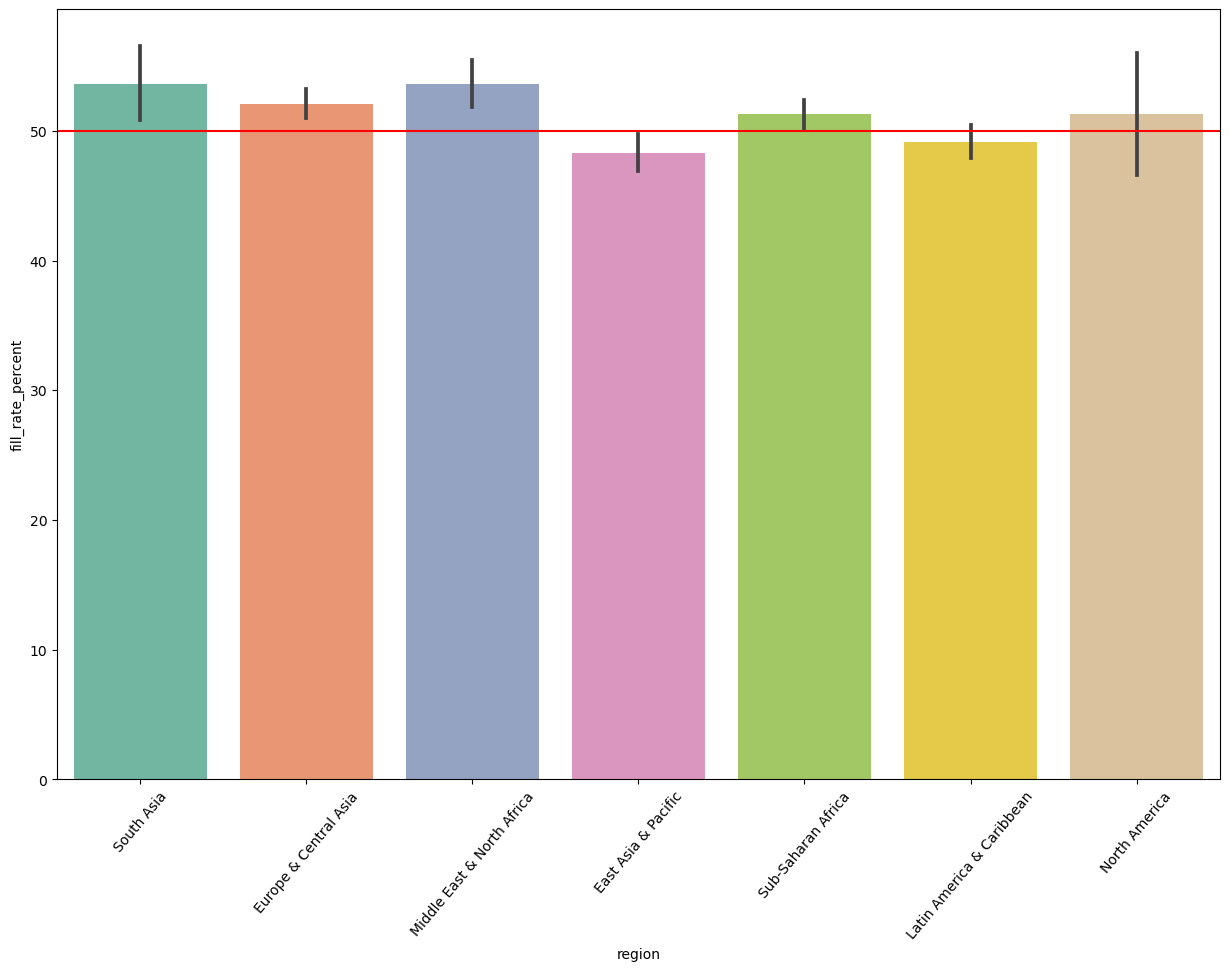

In [64]:
plt.subplots(figsize=(15, 10))

# Utilisation de la palette de couleurs "Set2"
sns.set_palette("Set2")

sns.barplot(x='region', y='fill_rate_percent', data=data_academy_clean)
plt.xticks(rotation=50)
plt.axhline(y=50, color='red')
plt.show()

**L'écart-type par ligne pour les colonnes d'année pourrait me servir à plusieurs fins dans l'analyse de nos données. Voici quelques utilisations potentielles :**

* **Mesurer la variation par pays au fil du temps :** En calculant l'écart-type par ligne, nous obtenons une mesure de la variation des données d'année en année pour chaque pays. Cela peut nous aider à comprendre comment les indicateurs changent au fil du temps et à identifier les pays où la variation est particulièrement élevée ou basse.

* **Identifier les pays stables ou volatils :** Nous pouvons utiliser l'écart-type par ligne pour identifier les pays dont les données sont stables (faible écart-type) ou volatiles (écart-type élevé) sur la période donnée. Cela peut être utile pour la prise de décision ou l'analyse de tendances.

* **Détecter les valeurs aberrantes :** L'écart-type par ligne peut aider à détecter les valeurs aberrantes dans nos données. Les pays avec des valeurs extrêmement éloignées de la moyenne (écart-type élevé) pourraient indiquer des situations exceptionnelles ou des erreurs de saisie de données.

* **Analyse de la stabilité :** Si nosu avons des hypothèses sur la stabilité des données au fil du temps, nous pouvons utiliser l'écart-type par ligne pour tester ces hypothèses. Par exemple, nous pouvons vérifier si la stabilité varie en fonction de la région ou du groupe de revenu.

* **Visualisation :** Nous pouvons créer des graphiques ou des visualisations basées sur l'écart-type par ligne pour mieux comprendre la variabilité des données par pays et par année.

*Le calcul de l'écart-type par ligne nous donne une mesure de la variabilité des données pour chaque pays sur la période d'observation. Cette mesure peut être utile pour explorer, analyser et interpréter nos données d'une manière significative pour notre analyse.*


In [65]:
# Sélectionner uniquement les colonnes d'année (2000 à 2015)
years = data_academy_clean.loc[:, '2000':'2015']

# Calculer l'écart-type par ligne
data_academy_clean['standard_deviation_per_row'] = years.std(axis=1)

In [66]:
data_academy_clean.sample(5)

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,region,income_group,topic,fill_rate_percent,standard_deviation_per_row
10069,Malta,MLT,"Barro-Lee: Average years of total schooling, a...",BAR.SCHL.2024,1.323000e+01,NaN,NaN,NaN,NaN,1.219000e+01,...,NaN,NaN,NaN,NaN,NaN,Middle East & North Africa,High income: nonOECD,Attainment,43.478261,5.202884e-01
1477,Sub-Saharan Africa,SSF,Population of the official age for secondary e...,SP.SEC.TOTL.IN,9.178142e+07,9.428351e+07,9.655098e+07,9.887586e+07,1.014270e+08,1.038834e+08,...,1.212399e+08,1.245876e+08,1.282324e+08,1.313362e+08,NaN,NaN,NaN,Population,86.956522,1.256668e+07
16200,West Bank and Gaza,PSE,"Barro-Lee: Population in thousands, age 15-19,...",BAR.POP.1519,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Middle East & North Africa,Lower middle income,Attainment,30.434783,NaN
476,Heavily indebted poor countries (HIPC),HPC,Barro-Lee: Average years of secondary schoolin...,BAR.SEC.SCHL.1519,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Attainment,21.739130,NaN
5009,Croatia,HRV,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,3.238160e+01,3.513302e+01,3.791397e+01,4.076137e+01,4.204595e+01,4.475249e+01,...,5.817231e+01,6.166721e+01,6.695503e+01,6.954415e+01,69.05249,Europe & Central Asia,High income: nonOECD,Tertiary,100.000000,1.193867e+01


In [67]:
data_academy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8470 entries, 0 to 16439
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_name                8470 non-null   object 
 1   country_code                8470 non-null   object 
 2   indicator_name              8470 non-null   object 
 3   indicator_code              8470 non-null   object 
 4   2000                        4636 non-null   float64
 5   2001                        2050 non-null   float64
 6   2002                        2069 non-null   float64
 7   2003                        2106 non-null   float64
 8   2004                        2102 non-null   float64
 9   2005                        4727 non-null   float64
 10  2006                        2002 non-null   float64
 11  2007                        1927 non-null   float64
 12  2008                        1916 non-null   float64
 13  2009                        1885

In [68]:
# Calculer Q1 et Q3
Q1 = data_academy_clean['standard_deviation_per_row'].quantile(0.25)
Q3 = data_academy_clean['standard_deviation_per_row'].quantile(0.75)

# Calculer l'IQR
IQR = Q3 - Q1

# Définir les limites supérieure et inférieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs aberrantes
outliers = data_academy_clean[(data_academy_clean['standard_deviation_per_row'] < lower_bound) | (data_academy_clean['standard_deviation_per_row'] > upper_bound)]

# Compter le nombre de valeurs aberrantes
num_outliers = len(outliers)

# Afficher le nombre de valeurs aberrantes
print("Nombre de valeurs aberrantes :", num_outliers)


Nombre de valeurs aberrantes : 1172


# Sélection de pays pour l'analyse :

In [69]:
selected_region = data_academy_clean[data_academy_clean['fill_rate_percent'] > 52]
selected_region = selected_region['region']
selected_region.unique().tolist()

[nan,
 'South Asia',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'East Asia & Pacific',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'North America']

In [70]:
selected_country = data_academy_clean[data_academy_clean['fill_rate_percent'] > 50] 
selected_country = selected_country['country_name']
selected_country.unique().tolist()

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Berm

Nous souhaitons exclure les groupes de région et les catégories économiques de notre liste de pays. Pour ce faire, nous pouvoins utiliser la variable `selected_country` que nous avons déjà créée, qui contient les pays dont le taux de remplissage est supérieur à 40 %. Voici comment nous  pouvons obtenir une liste de pays sans les groupes de région et les catégories économiques :

In [71]:
# Liste des pays à exclure (groupes de région et catégories économiques)
excluded_countries = [
    'Arab World',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Heavily indebted poor countries (HIPC)',
    'High income',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Low income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (excluding high income)',
    'Middle income',
    'North America',
    'OECD members',
    'South Asia',
    'Sub-Saharan Africa',
    'Sub-Saharan Africa (excluding high income)',
    'Upper middle income',
    'World'
]

# Filtrer les pays en excluant ceux de la liste
filtered_countries = selected_country[~selected_country.isin(excluded_countries)].unique().tolist()

# Afficher la liste résultante
print(filtered_countries)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Gib

In [72]:
data_academy_clean = data_academy_clean[data_academy_clean['country_name'].isin(filtered_countries)]
print(f"Nombre de Pays : {len(data_academy_clean['country_name'].unique())}")

Nombre de Pays : 214


In [73]:
#country_region_selected = nb_country.groupby(by=['country_name','region'])['fill_rate_percent'].sum()
#country_region_selected = pd.DataFrame(country_region_selected)
#country_region_selected.reset_index(inplace=True)
#country_region_selected

## Sélection des indicateurs (double stratégie : métier et technique)

Dans le cadre de notre analyse de données, nous adoptons une approche double, combinant à la fois des **critères métier et techniques** pour la sélection des indicateurs pertinents.

Pour répondre aux besoins essentiels de **l'éducation en ligne**, nous mettons l'accent sur deux indicateurs techniques clés : **"Internet users (per 100 people)"** qui mesure l'accès à Internet par habitant et **"Personal computers (per 100 people)"** qui évalue la possession d'ordinateurs personnels par habitant. Ces critères sont cruciaux pour évaluer la disponibilité des **ressources technologiques** nécessaires à l'apprentissage en ligne.

Du point de vue **économique**, nous nous concentrons sur **"GDP per capita"** pour cibler les pays à **fort pouvoir d'achat**. Cette mesure nous permet d'identifier les régions où les ressources financières sont plus abondantes, ce qui peut être un indicateur de la capacité à investir dans l'éducation en ligne.

En ce qui concerne la **démographie et l'éducation**, nous nous intéressons spécifiquement à la tranche **d'âge des 15-24 ans**. Cette catégorie englobe les **lycéens et les étudiants**, notre public cible, et nous permet de centrer notre analyse sur les données les plus pertinentes pour cette population spécifique.

In [74]:
nb_indicators= len(data_academy_clean['indicator_name'].unique())
print(f"Nombre d'indicateurs : {nb_indicators}")

Nombre d'indicateurs : 35


In [75]:
selected_indicators = data_academy_clean.groupby(by='indicator_name')['fill_rate_percent'].sum()/21400*100
selected_indicators.to_frame()

,fill_rate_percent
indicator_name,
"Barro-Lee: Average years of secondary schooling, age 15-19, total",39.089801
"Barro-Lee: Average years of secondary schooling, age 20-24, total",39.089801
"Barro-Lee: Average years of tertiary schooling, age 15-19, total",39.089801
"Barro-Lee: Average years of tertiary schooling, age 20-24, total",39.089801
"Barro-Lee: Average years of total schooling, age 15-19, total",39.089801
"Barro-Lee: Average years of total schooling, age 20-24, total",39.089801
Barro-Lee: Percentage of population age 15-19 with no education,39.089801
Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary,39.089801
Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary),39.089801


In [76]:
# Sélectionner uniquement les colonnes d'année (2000 à 2015)
years = data_academy_clean.loc[:, '2000':'2015']

# Calculer l'écart-type par ligne
data_academy_clean['mean_per_row'] = years.mean(axis=1)

In [77]:
# Fréquence indicateurs 
data_academy_clean.groupby('indicator_name').count()['mean_per_row'] / 214
data_academy_clean.head()

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,region,income_group,topic,fill_rate_percent,standard_deviation_per_row,mean_per_row
1700,Afghanistan,AFG,Barro-Lee: Average years of secondary schoolin...,BAR.SEC.SCHL.1519,0.63,NaN,NaN,NaN,NaN,1.09,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.313900,0.983333
1701,Afghanistan,AFG,Barro-Lee: Average years of secondary schoolin...,BAR.SEC.SCHL.2024,0.92,NaN,NaN,NaN,NaN,1.03,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.422177,1.216667
1702,Afghanistan,AFG,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.1519,0.04,NaN,NaN,NaN,NaN,0.03,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.005774,0.033333
1703,Afghanistan,AFG,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.2024,0.26,NaN,NaN,NaN,NaN,0.24,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.015275,0.243333
1704,Afghanistan,AFG,"Barro-Lee: Average years of total schooling, a...",BAR.SCHL.1519,4.50,NaN,NaN,NaN,NaN,3.39,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.746615,4.233333


In [78]:
data_academy_clean = data_academy_clean.rename(columns={'mean_per_row': 'average_score_2000_to_2015'})
data_academy_clean.sample()

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,region,income_group,topic,fill_rate_percent,standard_deviation_per_row,average_score_2000_to_2015
10211,Mauritania,MRT,Barro-Lee: Percentage of population age 20-24 ...,BAR.NOED.2024.ZS,35.25,NaN,NaN,NaN,NaN,24.47,...,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income,Attainment,43.478261,11.814686,23.79


In [79]:
df_average_score_2000_to_2015 = data_academy_clean.groupby(by='indicator_name')['average_score_2000_to_2015'].sum()
df_average_score_2000_to_2015.to_frame()

,average_score_2000_to_2015
indicator_name,
"Barro-Lee: Average years of secondary schooling, age 15-19, total",3.892800e+02
"Barro-Lee: Average years of secondary schooling, age 20-24, total",5.268467e+02
"Barro-Lee: Average years of tertiary schooling, age 15-19, total",9.390000e+00
"Barro-Lee: Average years of tertiary schooling, age 20-24, total",6.126667e+01
"Barro-Lee: Average years of total schooling, age 15-19, total",1.116343e+03
"Barro-Lee: Average years of total schooling, age 20-24, total",1.314293e+03
Barro-Lee: Percentage of population age 15-19 with no education,1.477783e+03
Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary,2.911990e+03
Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary),8.495200e+03


In [80]:
describe_df = df_average_score_2000_to_2015.to_frame()
describe_df['average_score_2000_to_2015'].describe().T

count    3.500000e+01
mean     7.237679e+07
std      2.502540e+08
min      9.390000e+00
25%      7.595407e+02
50%      1.646097e+03
75%      8.100532e+03
max      1.172296e+09
Name: average_score_2000_to_2015, dtype: float64

In [81]:
df_selected_indicators = selected_indicators.to_frame()

df_selected_indicators['fill_rate_percent'].describe().T

count    35.000000
mean     50.833575
std      21.719282
min      31.938236
25%      39.089801
50%      39.089801
75%      69.199512
max      95.814709
Name: fill_rate_percent, dtype: float64

In [82]:
list_indicators_refined = selected_indicators[selected_indicators > 39]
list_indicators_refined = list_indicators_refined.index.tolist()
list_indicators_refined

['Barro-Lee: Average years of secondary schooling, age 15-19, total',
 'Barro-Lee: Average years of secondary schooling, age 20-24, total',
 'Barro-Lee: Average years of tertiary schooling, age 15-19, total',
 'Barro-Lee: Average years of tertiary schooling, age 20-24, total',
 'Barro-Lee: Average years of total schooling, age 15-19, total',
 'Barro-Lee: Average years of total schooling, age 20-24, total',
 'Barro-Lee: Percentage of population age 15-19 with no education',
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary',
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)',
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary',
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
 'Barro-Lee: Percentage of population age 20-24 with no education',
 'Barro-Lee: Percentage of p

In [83]:
list_indicators_refined_2 = describe_df[describe_df > 2]
list_indicators_refined_2 = describe_df.index.tolist()
list_indicators_refined_2

['Barro-Lee: Average years of secondary schooling, age 15-19, total',
 'Barro-Lee: Average years of secondary schooling, age 20-24, total',
 'Barro-Lee: Average years of tertiary schooling, age 15-19, total',
 'Barro-Lee: Average years of tertiary schooling, age 20-24, total',
 'Barro-Lee: Average years of total schooling, age 15-19, total',
 'Barro-Lee: Average years of total schooling, age 20-24, total',
 'Barro-Lee: Percentage of population age 15-19 with no education',
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary',
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)',
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary',
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
 'Barro-Lee: Percentage of population age 20-24 with no education',
 'Barro-Lee: Percentage of p

* Pour filtrer les indicateurs en rapport avec les mots-clés spécifiques tels que "internet", "computer", "population 15-24 total", "Completed Secondary" et "Completed Tertiary" à partir de notre liste `list_indicators_refined`, nous pouvons utiliser une compréhension de liste :


In [84]:
# Liste des mots-clés pour la filtration (en minuscules)
mots_cles = ['gdp',
             'internet',
             'computer',
             'population, ages 15-24, total',
             'completed secondary',
             'completed tertiary']

# Filtrer les indicateurs en utilisant une compréhension de liste
indicators_filtered = [indicator for indicator in list_indicators_refined if any(mot in indicator.lower() for mot in mots_cles) and 'incomplete' not in indicator.lower()]

# Afficher la liste des indicateurs filtrés
print(indicators_filtered)
print(len(indicators_filtered))


['Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary', 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary', 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary', 'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary', 'GDP per capita (current US$)', 'Internet users (per 100 people)', 'Personal computers (per 100 people)', 'Population, ages 15-24, total']
8


In [85]:
# Filtrer le DataFrame
filtered_data = data_academy_clean[data_academy_clean['indicator_name'].isin(indicators_filtered)]

# Nombre d'indicateurs sélectionnés
num_selected_indicators = len(indicators_filtered)

# Liste des indicateurs sélectionnés
selected_indicator_list = indicators_filtered

# Afficher le nombre et la liste des indicateurs sélectionnés
print(num_selected_indicators)
print(selected_indicator_list)

# Résultat final
data_edstats_final = filtered_data
data_edstats_final.head()

8
['Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary', 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary', 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary', 'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary', 'GDP per capita (current US$)', 'Internet users (per 100 people)', 'Personal computers (per 100 people)', 'Population, ages 15-24, total']


,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,region,income_group,topic,fill_rate_percent,standard_deviation_per_row,average_score_2000_to_2015
1707,Afghanistan,AFG,Barro-Lee: Percentage of population age 15-19 ...,BAR.SEC.CMPT.1519.ZS,6.71,NaN,NaN,NaN,NaN,8.07000,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,1.370012,8.076667
1709,Afghanistan,AFG,Barro-Lee: Percentage of population age 15-19 ...,BAR.TER.CMPT.1519.ZS,0.30,NaN,NaN,NaN,NaN,0.28000,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.015275,0.283333
1712,Afghanistan,AFG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,10.33,NaN,NaN,NaN,NaN,12.87000,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,2.635571,12.933333
1714,Afghanistan,AFG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,3.73,NaN,NaN,NaN,NaN,3.54000,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.180093,3.546667
1728,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,117.409691,187.845095,198.728544,219.141353,250.29413,...,669.009051,631.744971,612.069651,569.577923,South Asia,Low income,Economic Policy & Debt: National accounts: US$...,95.652174,189.892211,404.954067


In [86]:
# Spécifie le nom du fichier de sortie (peut être modifié)
nom_fichier = "data_edstats_final.csv"

# Enregistre le DataFrame au format CSV
data_edstats_final.to_csv(nom_fichier, index=False)

print(f"Le DataFrame a été enregistré sous le nom '{nom_fichier}'.")

Le DataFrame a été enregistré sous le nom 'data_edstats_final.csv'.


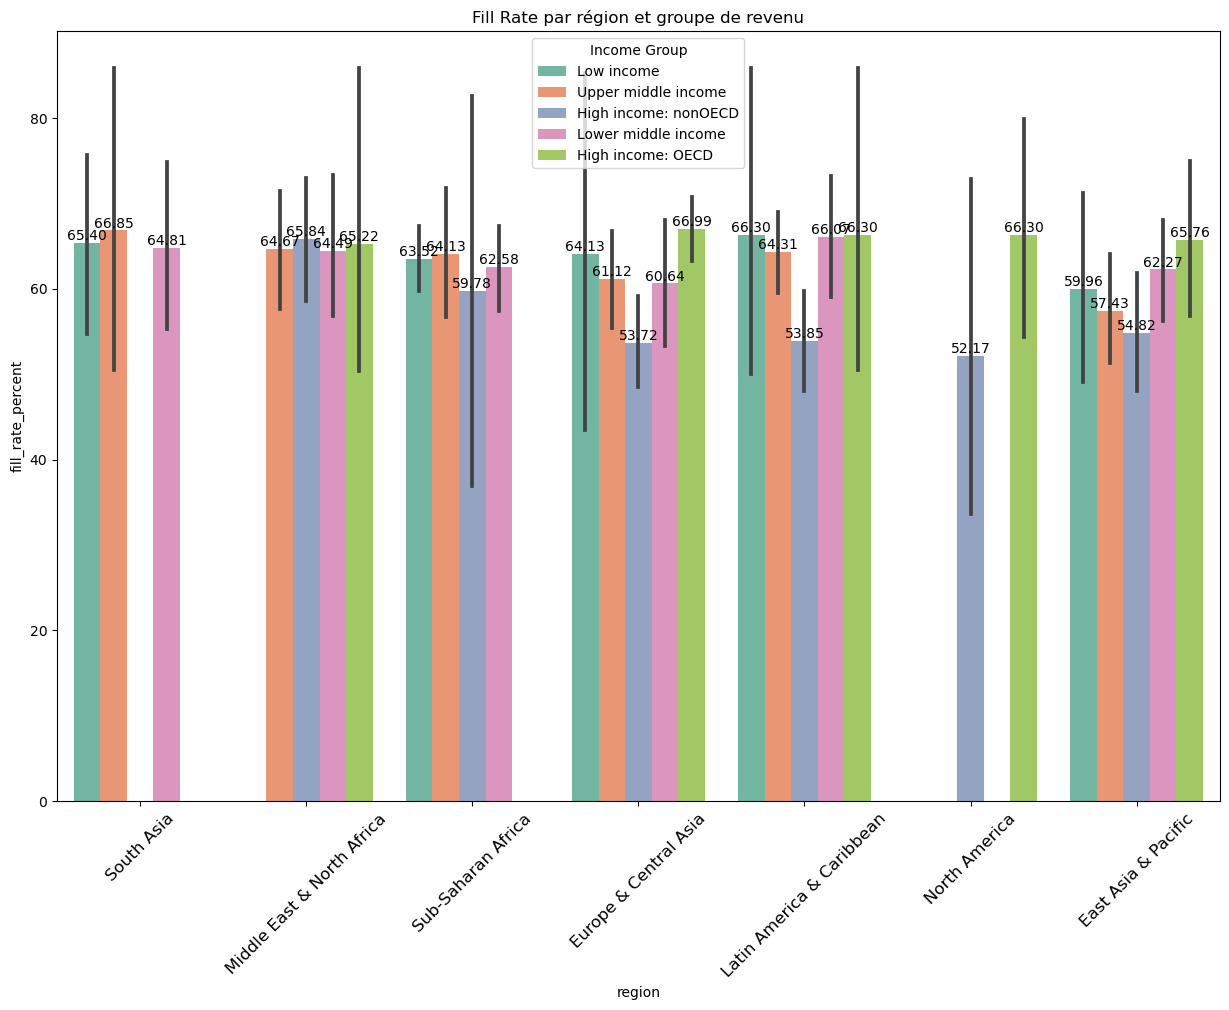

In [87]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_palette("Set2")

# Créer le graphique à barres triées par fill_rate décroissant
sns.barplot(x="region", y="fill_rate_percent", hue="income_group", data=data_edstats_final,
            order=data_edstats_final.groupby("region")["fill_rate_percent"].mean().sort_values(ascending=False).index)

# Personnaliser la taille de la police des labels de la région
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Ajouter des étiquettes de données au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Ajouter une légende
ax.legend(title="Income Group")

# Titre du graphique
plt.title("Fill Rate par région et groupe de revenu")

# Afficher le graphique
plt.xticks(rotation=45)
plt.show()


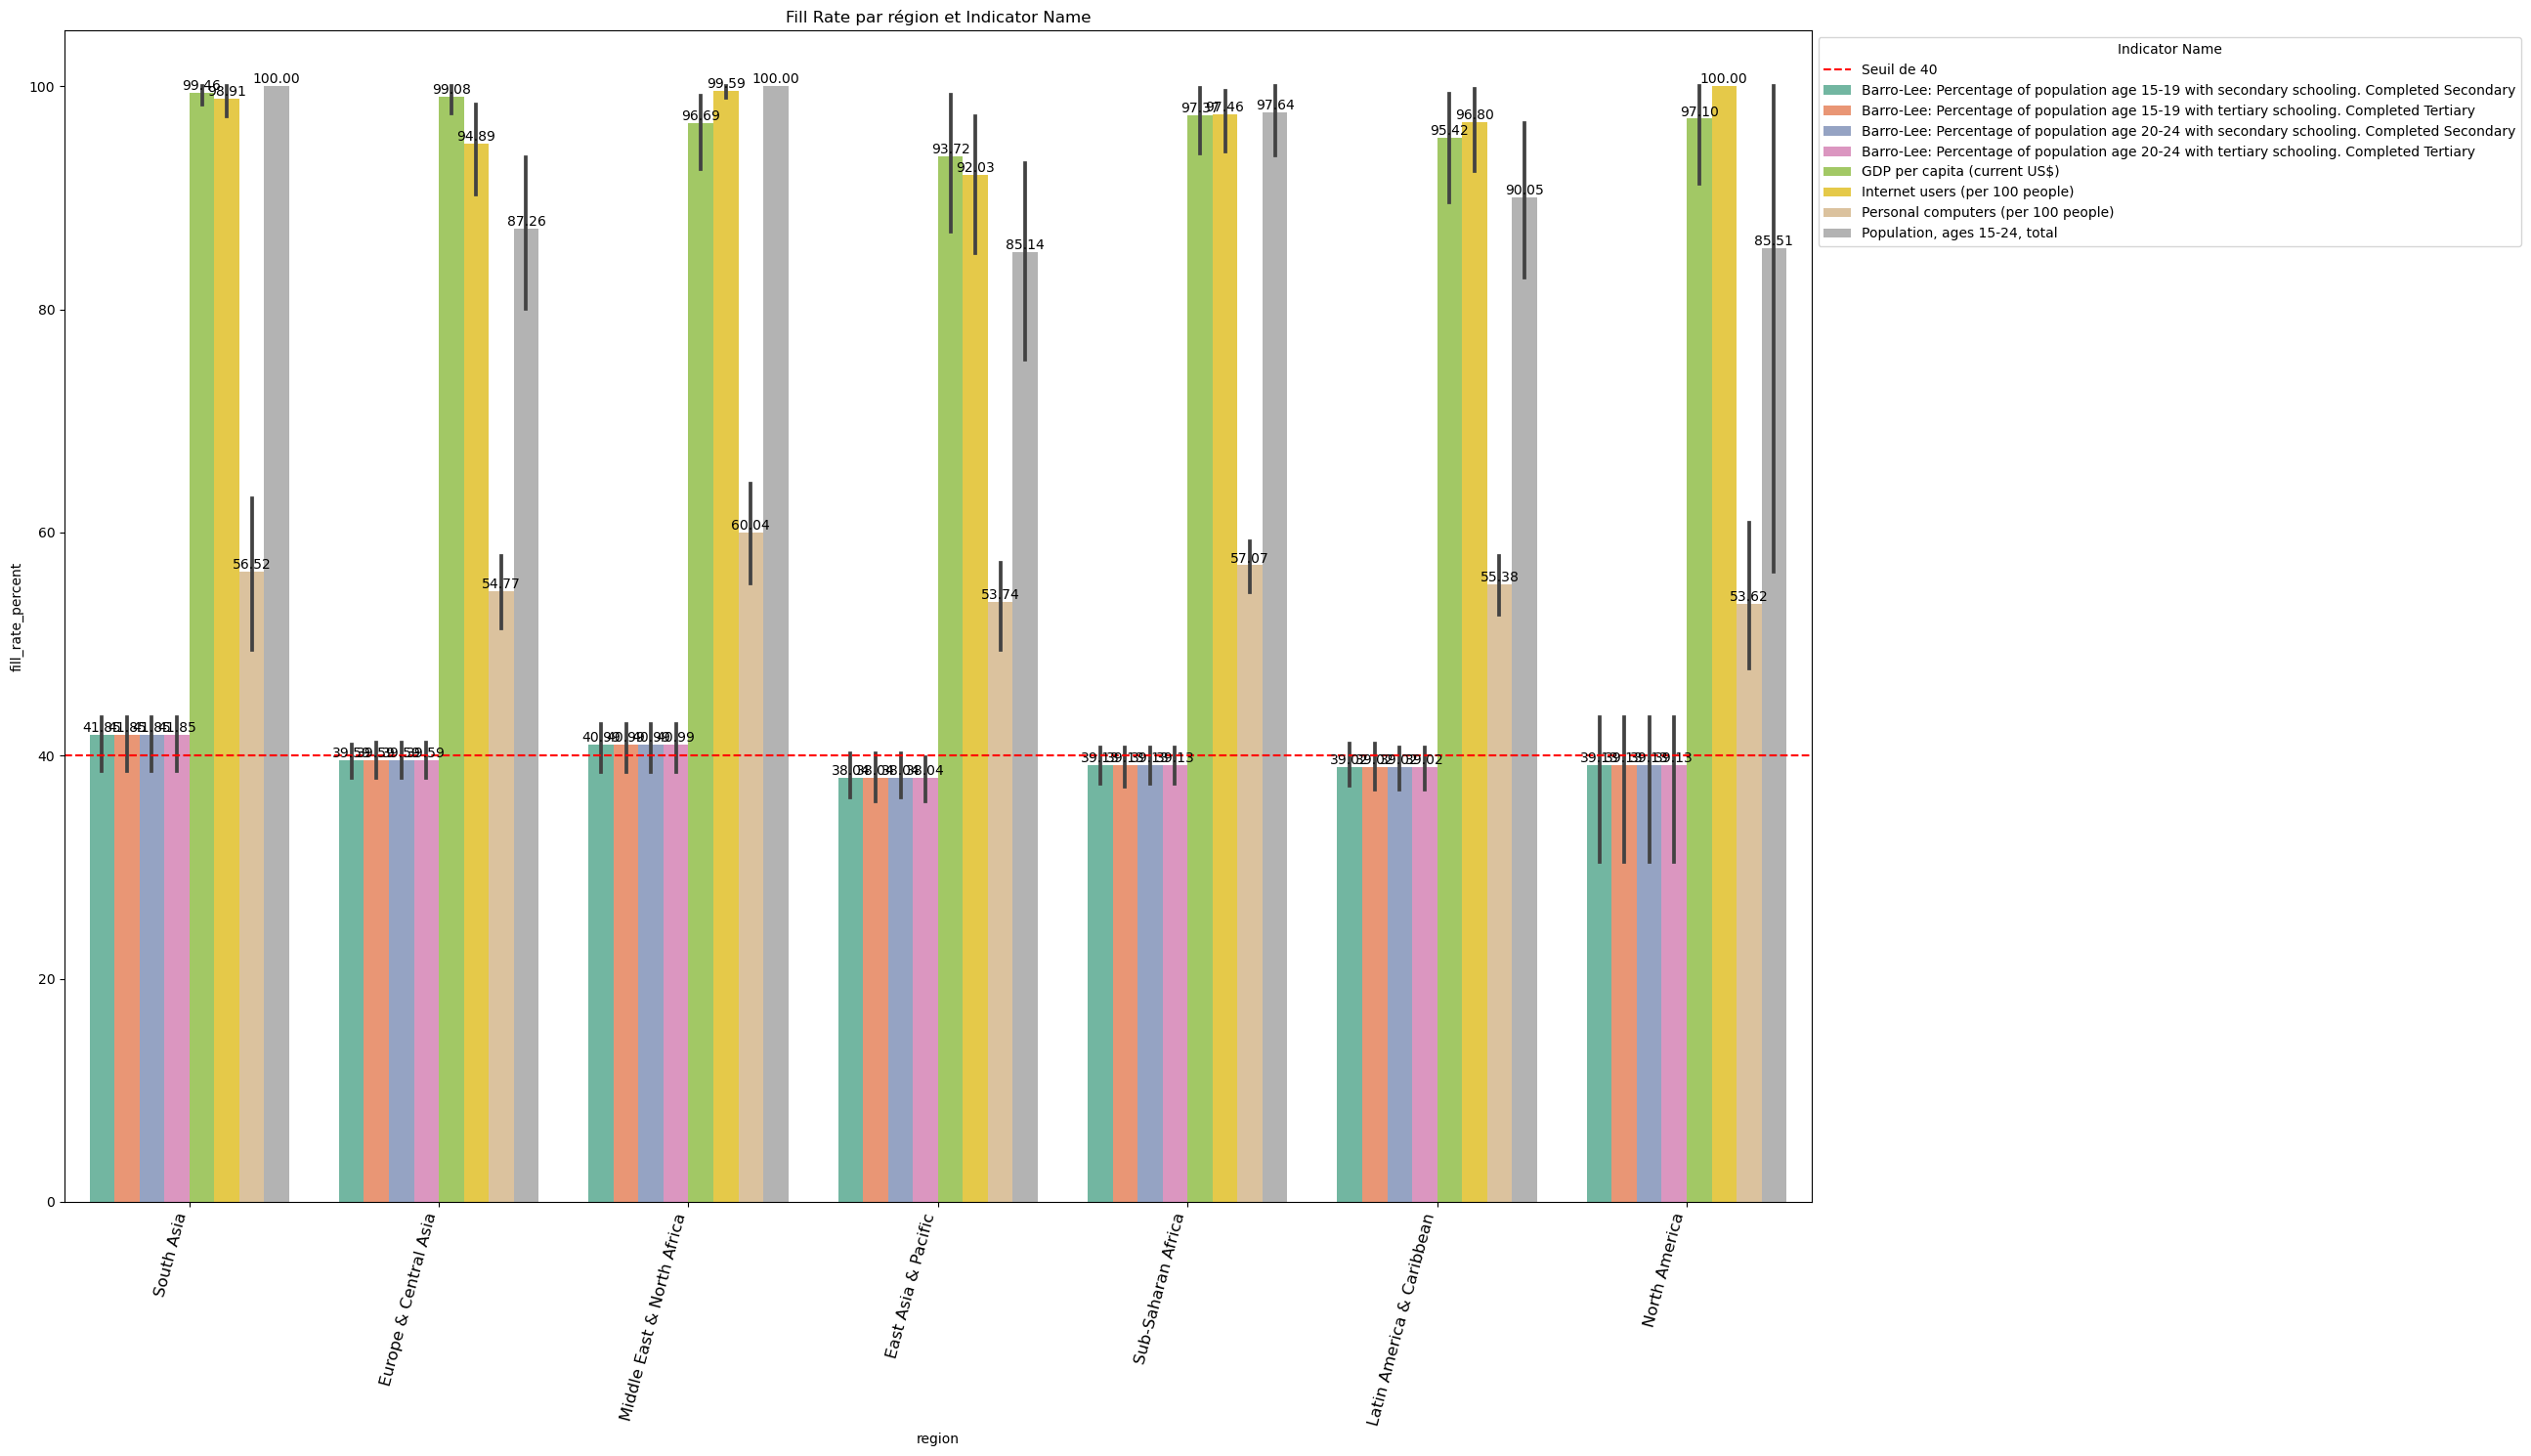

In [88]:
f, ax = plt.subplots(figsize=(26, 15))
sns.set_palette("Set2")

# Créer le graphique à barres triées par fill_rate décroissant
sns.barplot(x="region", y="fill_rate_percent", hue="indicator_name", data=data_edstats_final)

# Personnaliser la taille de la police des labels de la région
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Ajouter des étiquettes de données au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Ajouter une ligne horizontale rouge à 45
plt.axhline(y=40, color='red', linestyle='--', label='Seuil de 40')

# Ajouter une légende claire
ax.legend(title="Indicator Name", loc="upper left", bbox_to_anchor=(1, 1))

# Titre du graphique
plt.title("Fill Rate par région et Indicator Name")

# Afficher le graphique avec une rotation des labels sur l'axe x
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


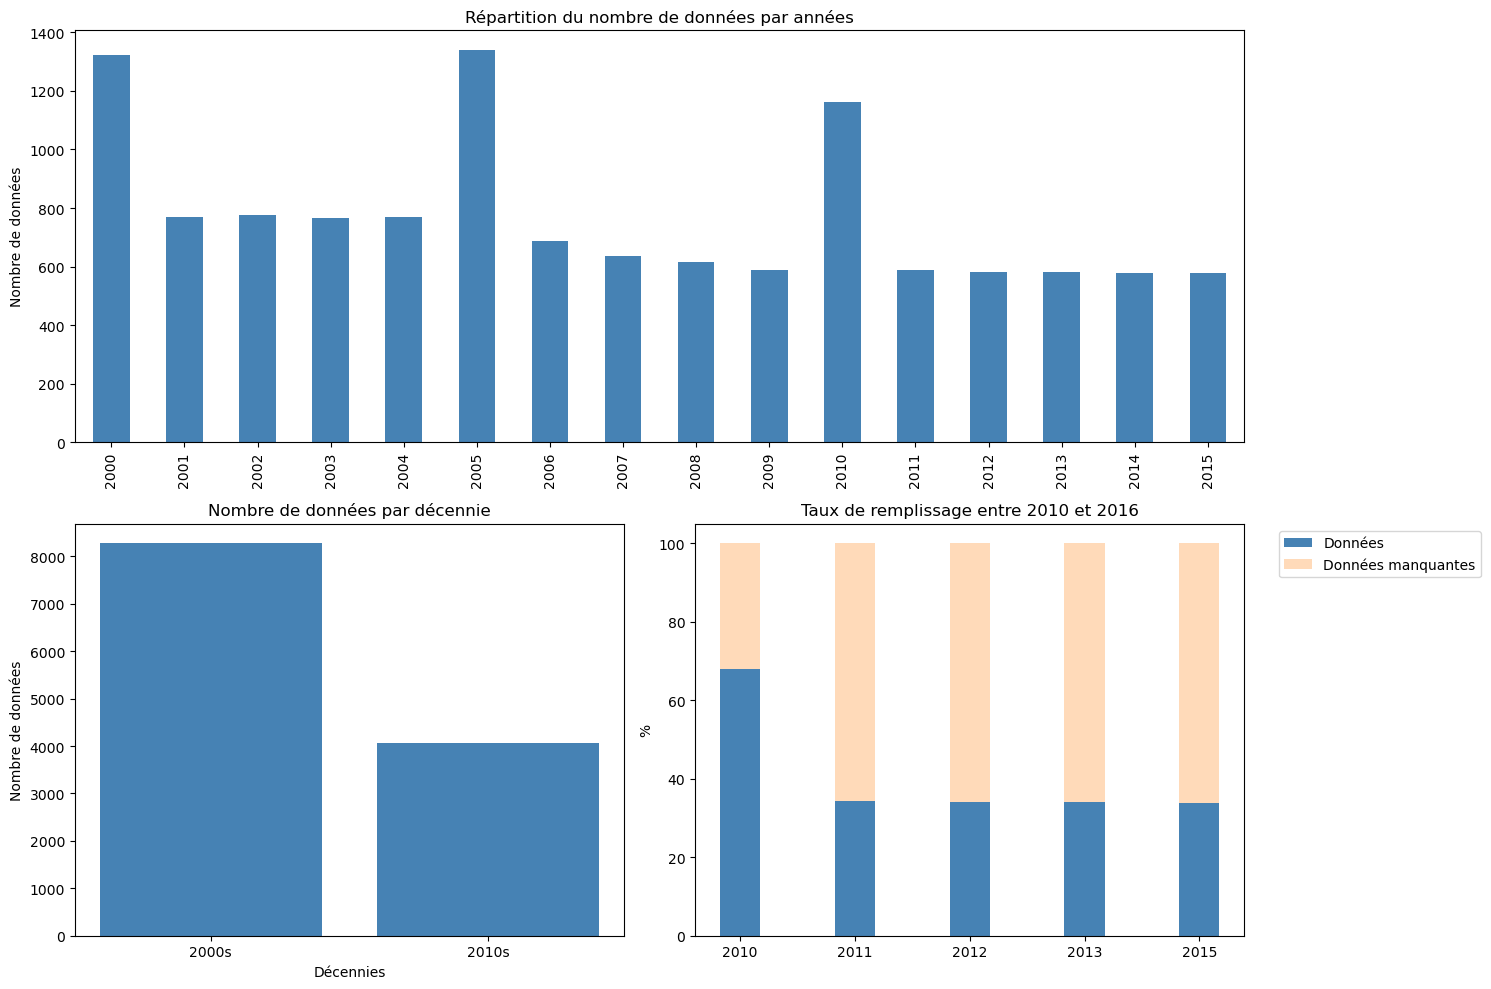

In [89]:
# Création d'une figure avec une grille de 2x2
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)

# Premier sous-graphique (Répartition du nombre de données par années)
ax1 = plt.subplot(G[0, :])

# Calcul du nombre de données présentes pour chaque année
data_present = data_edstats_final.loc[:, '2000':'2015'].notnull().sum()

# Création d'un graphique en barres pour la répartition
ax1 = data_present.plot(kind='bar', color='SteelBlue')
ax1.set_title('Répartition du nombre de données par années')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)

# Deuxième sous-graphique (Nombre de données par décennie)
ax2 = plt.subplot(G[1, 0])

# Copie des données pour les années de 2000 à 2020
decade = data_edstats_final.loc[:, '2000':'2015'].copy()

# Création des décennies
decades = ['2000s', '2010s']
decade_sum = []

for decade in decades:
    start_year, end_year = int(decade[:4]), int(decade[:4]) + 10
    cols = [str(year) for year in range(start_year, end_year) if str(year) in data_edstats_final.columns]
    decade_sum.append(data_edstats_final[cols].count().sum())

# Création d'un graphique en barres pour le nombre de données par décennie
width = 0.4
ax2.bar(decades, decade_sum, color='SteelBlue')
ax2.set_xlabel('Décennies')
ax2.set_ylabel('Nombre de données')
ax2.set_title('Nombre de données par décennie', size=12)
ax2.grid(False)

# Troisième sous-graphique (Taux de remplissage entre 2010 et 2016)
ax3 = plt.subplot(G[1, 1])

# Nombre total de données
nb_tot = data_edstats_final.shape[0]

# Sélection des années
annees_selectionnees = ['2010', '2011', '2012', '2013', '2015']

# Calcul du nombre de données non nulles pour chaque année
nb_nonnul = data_edstats_final[annees_selectionnees].count()
df_annees_selectionnees = pd.DataFrame({'Année': annees_selectionnees, 'Nombre de données non nulles': nb_nonnul.values})

# Calcul des pourcentages de données non nulles et NaN
df_annees_selectionnees['% de données non nulles'] = round((df_annees_selectionnees['Nombre de données non nulles']) * 100 / nb_tot, 2)
df_annees_selectionnees['% de données manquantes'] = round(100 - df_annees_selectionnees['% de données non nulles'], 2)

# Création d'un graphique en barres empilées pour le taux de remplissage
width = 0.35
annees = df_annees_selectionnees.index
taux_remplissage = df_annees_selectionnees['% de données non nulles']
taux_nan = df_annees_selectionnees['% de données manquantes']
ax3.bar(annees_selectionnees, taux_remplissage, width, label='Données', color='SteelBlue')
ax3.bar(annees_selectionnees, taux_nan, width, bottom=taux_remplissage, label='Données manquantes', color='PeachPuff')
ax3.set_ylabel('%')
ax3.set_title('Taux de remplissage entre 2010 et 2016')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2)
ax3.grid(False)

# Affichage de la figure
plt.tight_layout()
plt.show()


* Nous pouvons observer un pic de données tous les 5ans 
* 2015 est la dernière année où les données sont exploitables

In [90]:
data_edstats_final.sample(5)

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,region,income_group,topic,fill_rate_percent,standard_deviation_per_row,average_score_2000_to_2015
2052,Angola,AGO,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Upper middle income,Attainment,30.434783,NaN,NaN
11135,Nepal,NPL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,4.761622e+06,4.891424e+06,5.022034e+06,5.155211e+06,5.293549e+06,5.438514e+06,...,6.490448e+06,6.616767e+06,6.725496e+06,6.812730e+06,South Asia,Low income,Population,100.000000,679722.014700,5.816668e+06
4429,Chile,CHL,Barro-Lee: Percentage of population age 15-19 ...,BAR.TER.CMPT.1519.ZS,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,...,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income: OECD,Attainment,43.478261,0.011547,6.666667e-03
14376,Swaziland,SWZ,GDP per capita (current US$),NY.GDP.PCAP.CD,1.637450e+03,1.437635e+03,1.324996e+03,2.020994e+03,2.529634e+03,2.873862e+03,...,3.864760e+03,3.587000e+03,3.379896e+03,3.047947e+03,Sub-Saharan Africa,Lower middle income,Economic Policy & Debt: National accounts: US$...,100.000000,833.670425,2.824281e+03
7424,Honduras,HND,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,1.555000e+01,NaN,NaN,NaN,NaN,2.051000e+01,...,NaN,NaN,NaN,NaN,Latin America & Caribbean,Lower middle income,Attainment,43.478261,9.430956,2.328333e+01


In [91]:
data_edstats_final.head()

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,region,income_group,topic,fill_rate_percent,standard_deviation_per_row,average_score_2000_to_2015
1707,Afghanistan,AFG,Barro-Lee: Percentage of population age 15-19 ...,BAR.SEC.CMPT.1519.ZS,6.71,NaN,NaN,NaN,NaN,8.07000,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,1.370012,8.076667
1709,Afghanistan,AFG,Barro-Lee: Percentage of population age 15-19 ...,BAR.TER.CMPT.1519.ZS,0.30,NaN,NaN,NaN,NaN,0.28000,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.015275,0.283333
1712,Afghanistan,AFG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,10.33,NaN,NaN,NaN,NaN,12.87000,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,2.635571,12.933333
1714,Afghanistan,AFG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,3.73,NaN,NaN,NaN,NaN,3.54000,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.180093,3.546667
1728,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,117.409691,187.845095,198.728544,219.141353,250.29413,...,669.009051,631.744971,612.069651,569.577923,South Asia,Low income,Economic Policy & Debt: National accounts: US$...,95.652174,189.892211,404.954067


In [92]:
data_edstats_final.reset_index(inplace = True)

In [93]:
data_edstats_final.head()

,index,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,region,income_group,topic,fill_rate_percent,standard_deviation_per_row,average_score_2000_to_2015
0,1707,Afghanistan,AFG,Barro-Lee: Percentage of population age 15-19 ...,BAR.SEC.CMPT.1519.ZS,6.71,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,1.370012,8.076667
1,1709,Afghanistan,AFG,Barro-Lee: Percentage of population age 15-19 ...,BAR.TER.CMPT.1519.ZS,0.30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.015275,0.283333
2,1712,Afghanistan,AFG,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,10.33,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,2.635571,12.933333
3,1714,Afghanistan,AFG,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,3.73,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,South Asia,Low income,Attainment,43.478261,0.180093,3.546667
4,1728,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,117.409691,187.845095,198.728544,219.141353,...,669.009051,631.744971,612.069651,569.577923,South Asia,Low income,Economic Policy & Debt: National accounts: US$...,95.652174,189.892211,404.954067


# 5) Top 10 des pays séléctionnés :<a class="anchor" id="5"></a>

[Retour au sommaire](#sommaire)

**Pays aux revenus élevés**

statistiques et visualisations liées aux indicateurs ( par pays en sélectionnant un top...)

In [94]:
# Filtrer les données en fonction des groupes de revenu souhaités
income_values = ['High income: nonOECD', 'High income: OECD']
data_edstats_final = data_edstats_final[data_edstats_final['income_group'].isin(income_values)]

# Définir un index hiérarchique en utilisant les colonnes 'region', 'income_group' et 'country_name'
list_country = data_edstats_final.set_index(['region', 'income_group', 'country_name']).sort_index()

# Obtenir la liste des pays uniques en utilisant l'index au niveau du nom du pays
list_of_countries = list_country.index.get_level_values('country_name').unique()

list_of_indicators = data_edstats_final['indicator_name'].unique()

# Afficher la liste des pays uniques
print(list_of_countries)
print(len(list_of_countries))

Index(['Australia', 'Japan', 'Korea, Rep.', 'New Zealand', 'Brunei Darussalam',
       'French Polynesia', 'Guam', 'Hong Kong SAR, China', 'Macao SAR, China',
       'New Caledonia', 'Northern Mariana Islands', 'Singapore', 'Austria',
       'Belgium', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Luxembourg',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'Andorra', 'Channel Islands', 'Croatia', 'Cyprus', 'Faroe Islands',
       'Greenland', 'Isle of Man', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Monaco', 'Russian Federation', 'San Marino', 'Chile',
       'Antigua and Barbuda', 'Aruba', 'Bahamas, The', 'Barbados',
       'Cayman Islands', 'Curacao', 'Puerto Rico', 'St. Kitts and Nevis',
       'Trinidad and Tobago', 'Uruguay', 'Virgin Islands (U.S.)', 'Israel',
       'Bahrain', 'Kuwait', 'Malta', 'Om

# Attribution de pondérations à chaque indicateur pour une analyse plus précise

### Attribution de coefficient

* **Sans pondération (ou non pondéré) :** Dans ce cas, chaque élément ou observation de l'ensemble de données est traité de manière égale, sans tenir compte de sa signification relative ou de son importance. Cela signifie que toutes les données ont le même poids lors des calculs ou des analyses.

* **Avec pondération (ou pondéré) :** Lorsque les données sont pondérées, cela signifie que certaines observations ou éléments sont considérés comme plus importants ou significatifs que d'autres, et ils reçoivent donc un poids plus élevé dans les calculs. Les pondérations sont généralement définies en fonction de critères spécifiques, tels que l'importance relative, la fréquence, ou d'autres facteurs pertinents.

#### Sans ponderation :

In [95]:
# Obtenir les valeurs uniques de la colonne "indicator_name"
valeurs_uniques_indicator_name = data_edstats_final["indicator_name"].unique()

# Obtenir les valeurs uniques de la colonne "indicator_code"
valeurs_uniques_indicator_code = data_edstats_final["indicator_code"].unique()

# Affiche les valeurs uniques
print("Valeurs uniques de indicator_name:")
print(valeurs_uniques_indicator_name)

print("\nValeurs uniques de indicator_code:")
print(valeurs_uniques_indicator_code)


Valeurs uniques de indicator_name:
['Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary'
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary'
 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary'
 'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary'
 'GDP per capita (current US$)' 'Internet users (per 100 people)'
 'Personal computers (per 100 people)' 'Population, ages 15-24, total']

Valeurs uniques de indicator_code:
['BAR.SEC.CMPT.1519.ZS' 'BAR.TER.CMPT.1519.ZS' 'BAR.SEC.CMPT.2024.ZS'
 'BAR.TER.CMPT.2024.ZS' 'NY.GDP.PCAP.CD' 'IT.NET.USER.P2' 'IT.CMP.PCMP.P2'
 'SP.POP.1524.TO.UN']


Nous allons attribuer un baréme de note sur une échelle de 0 à 5 pour voir le degré d'importance de l'indicateurs ( plus la note est élevée plus l'indicateur est important)

In [96]:
# Création d'une copie du DataFrame data_edstats_final
indicators_pivot = data_edstats_final.copy(deep=True)

In [97]:
# Sélectionne les colonnes d'année de 2000 à 2015
years = [str(year) for year in range(2000, 2016)]
selected_columns = ['country_name', 'country_code', 'indicator_name', 'indicator_code'] + years

# Sélectionne les lignes où "indicator_name" n'est pas nul
data_selected_years = indicators_pivot[selected_columns].dropna(subset=['indicator_name'])

# Calcule la moyenne des indicateurs sur la période
data_selected_years['mean_indicator'] = data_selected_years[years].mean(axis=1)

In [98]:
data_selected_years.head()

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean_indicator
32,Andorra,AND,Barro-Lee: Percentage of population age 15-19 ...,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Andorra,AND,Barro-Lee: Percentage of population age 15-19 ...,BAR.TER.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Andorra,AND,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Andorra,AND,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,21936.530101,22228.846493,24741.49357,32776.44227,38503.479614,41282.020122,...,48582.808455,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,37694.037953


In [99]:
# Sélectionne les indicateurs souhaités et les colonnes nécessaires
indicators_to_select = ['BAR.SEC.CMPT.1519.ZS', 'BAR.TER.CMPT.1519.ZS', 'BAR.SEC.CMPT.2024.ZS', 'BAR.TER.CMPT.2024.ZS', 'NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'SP.POP.1524.TO.UN']
data_selected_indicators = data_selected_years[data_selected_years['indicator_code'].isin(indicators_to_select)]

# Pivoter les données pour avoir les indicateurs en colonnes et les pays en index
indicators_values = data_selected_indicators.pivot(index='country_name', columns='indicator_code', values='mean_indicator')

# Réinitialiser l'index pour obtenir le résultat souhaité
indicators_values.reset_index(inplace=True)

In [100]:
indicators_values.head()

indicator_code,country_name,BAR.SEC.CMPT.1519.ZS,BAR.SEC.CMPT.2024.ZS,BAR.TER.CMPT.1519.ZS,BAR.TER.CMPT.2024.ZS,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.CD,SP.POP.1524.TO.UN
0,Andorra,NaN,NaN,NaN,NaN,NaN,60.227381,37694.037953,7.739857e+03
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,13.803117,37.409794,11933.175476,1.298050e+04
2,Aruba,NaN,NaN,NaN,NaN,8.920613,46.611503,23345.149016,1.298738e+04
3,Australia,56.636667,74.02,0.096667,5.320000,53.622604,71.562854,42945.048656,2.829062e+06
4,Austria,7.690000,69.20,0.263333,4.043333,50.036888,63.952521,41476.463740,9.895141e+05


In [101]:
indicators_values.describe()

indicator_code,BAR.SEC.CMPT.1519.ZS,BAR.SEC.CMPT.2024.ZS,BAR.TER.CMPT.1519.ZS,BAR.TER.CMPT.2024.ZS,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.CD,SP.POP.1524.TO.UN
count,49.000000,49.000000,49.000000,49.000000,61.000000,68.000000,71.000000,5.900000e+01
mean,24.895646,50.396599,0.481905,9.561088,31.476420,54.690818,35024.346987,2.762649e+06
std,18.127947,17.153263,0.924518,7.389190,21.400934,16.238696,24287.191861,6.555601e+06
min,4.500000,8.013333,0.000000,0.743333,0.809174,6.121410,8369.243179,4.198000e+03
25%,12.170000,39.876667,0.016667,4.993333,12.647199,42.723114,15811.463195,1.056068e+05
50%,19.133333,50.900000,0.096667,7.273333,25.966191,52.783825,31099.709716,6.005366e+05
75%,28.136667,64.140000,0.303333,12.840000,48.376829,68.611080,43486.767538,1.633782e+06
max,77.683333,85.520000,4.176667,30.306667,80.694446,85.527488,130851.110457,4.338113e+07


### Distribution des données 

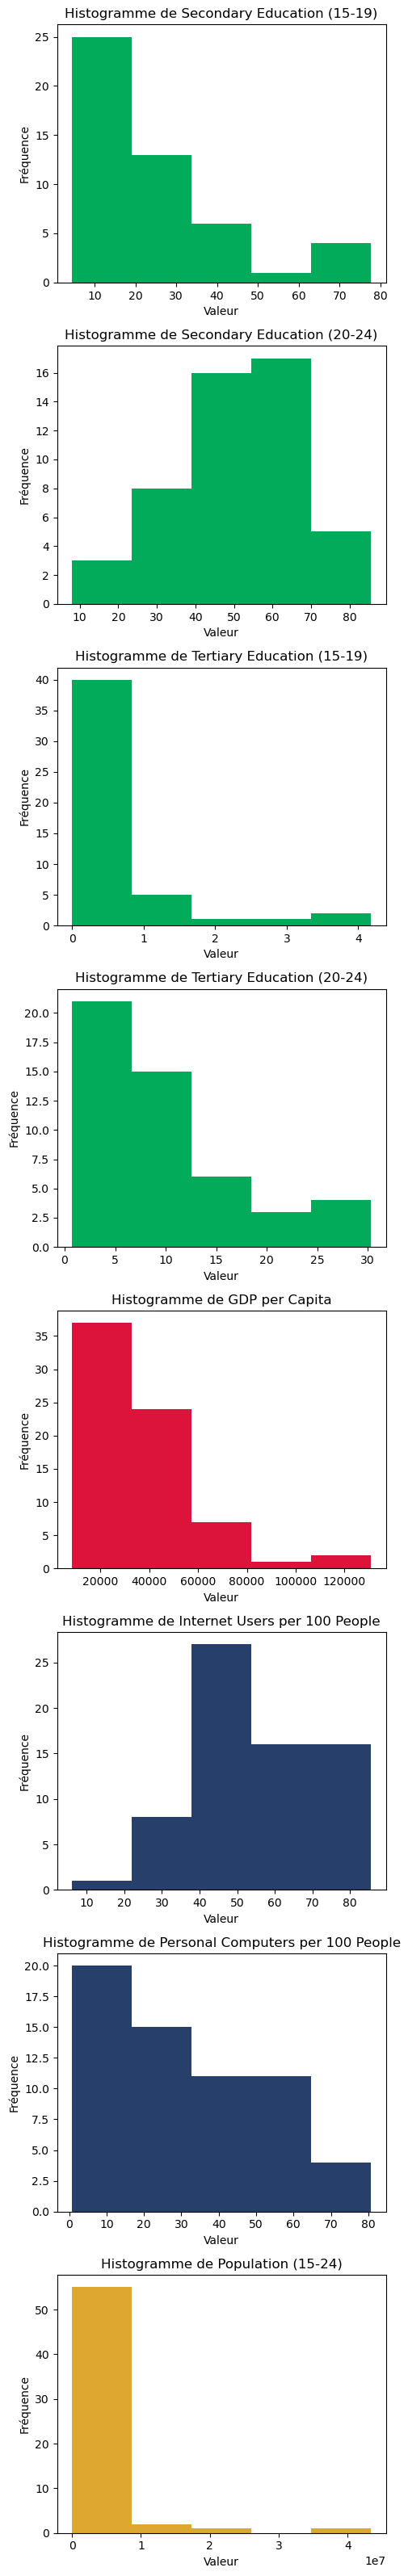

In [102]:
# Liste des indicateurs à tracer avec leurs noms
indicators_to_plot = [
    ('BAR.SEC.CMPT.1519.ZS', 'Secondary Education (15-19)'),
    ('BAR.SEC.CMPT.2024.ZS', 'Secondary Education (20-24)'),
    ('BAR.TER.CMPT.1519.ZS', 'Tertiary Education (15-19)'),
    ('BAR.TER.CMPT.2024.ZS', 'Tertiary Education (20-24)'),
    ('NY.GDP.PCAP.CD', 'GDP per Capita'),
    ('IT.NET.USER.P2', 'Internet Users per 100 People'),
    ('IT.CMP.PCMP.P2', 'Personal Computers per 100 People'),
    ('SP.POP.1524.TO.UN', 'Population (15-24)')
]

# Couleurs pour les graphiques
colors = ['#01AB59', '#01AB59', '#01AB59', '#01AB59', '#dc143c', '#263f6b','#263f6b', '#dea72f']

# Crée une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(nrows=len(indicators_to_plot), ncols=1, figsize=(5, 4 * len(indicators_to_plot)))

# Parcoure les indicateurs et créez des graphiques pour chaque indicateur
for i, (indicator, indicator_name) in enumerate(indicators_to_plot):
    ax = axes[i]
    ax.hist(indicators_values[indicator], bins=5, color=colors[i])
    ax.set_title(f'Histogramme de {indicator_name}')
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Fréquence')

# Ajuste l'espacement entre les sous-graphiques
plt.tight_layout()

# Affiche les graphiques
plt.show()

In [103]:
# Échelle de notation pour la variable 'IT.NET.USER.P2'
min_score = 1
max_score = 5

# Fonction pour calculer le score en fonction de la valeur de 'IT.NET.USER.P2'
def calculate_score(value):
    if pd.notna(value):
        # Normalisation de la valeur de 'IT.NET.USER.P2' entre 0 et 1
        normalized_value = (value - min_value) / (max_value - min_value)
        # Calcul du score en utilisant l'échelle de notation
        score = min_score + (max_score - min_score) * normalized_value
        return score
    else:
        return None

# Définisse les valeurs minimales et maximales de 'IT.NET.USER.P2'
min_value = indicators_values['IT.NET.USER.P2'].min()
max_value = indicators_values['IT.NET.USER.P2'].max()

# Crée la colonne 'score_digital' en appliquant la fonction de calcul du score
indicators_values['score_digital'] = indicators_values['IT.NET.USER.P2'].apply(calculate_score)

# Trie le DataFrame par la colonne 'score_digital' de manière décroissante
top_10_countries = indicators_values.sort_values(by='score_digital', ascending=False).head(10)

# Affiche le top 10 des pays
print(top_10_countries[['country_name', 'IT.NET.USER.P2', 'score_digital']])


indicator_code country_name  IT.NET.USER.P2  score_digital
31                  Iceland       85.527488       5.000000
50                   Norway       84.279604       4.937139
64                   Sweden       82.531693       4.849090
19                  Denmark       80.474386       4.745455
46              Netherlands       79.214663       4.681998
23                  Finland       75.963797       4.518239
37              Korea, Rep.       75.337786       4.486704
65              Switzerland       74.719505       4.455559
9                   Bermuda       74.345017       4.436694
11                   Canada       74.074954       4.423090


In [104]:
# Liste des indicateurs
indicators_list = ['BAR.SEC.CMPT.1519.ZS', 'BAR.TER.CMPT.1519.ZS', 'BAR.SEC.CMPT.2024.ZS', 'BAR.TER.CMPT.2024.ZS',
                   'NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'SP.POP.1524.TO.UN']

# Créer un DataFrame pour les scores
scores_df = indicators_values[['country_name']]

# Boucler sur chaque indicateur pour calculer le score
for indicator in indicators_list:
    min_value = indicators_values[indicator].min()
    max_value = indicators_values[indicator].max()
    
    # Fonction pour calculer le score en fonction de la valeur de l'indicateur
    def calculate_score(value):
        if pd.notna(value):
            # Normalisation de la valeur de l'indicateur entre 0 et 1
            normalized_value = (value - min_value) / (max_value - min_value)
            # Calcul du score en utilisant l'échelle de notation (1 à 5)
            score = 1 + (5 - 1) * normalized_value
            return score
        else:
            return None

    # Calculer le score pour l'indicateur actuel
    scores_df[f'score_{indicator}'] = indicators_values[indicator].apply(calculate_score)

# Afficher le top 10 des pays pour chaque indicateur
for indicator in indicators_list:
    top_10_countries = scores_df[['country_name', f'score_{indicator}']].sort_values(by=f'score_{indicator}', ascending=False).head(10)
    print(f"Top 10 des pays pour l'indicateur {indicator}:")
    print(top_10_countries)
    print("\n")


Top 10 des pays pour l'indicateur BAR.SEC.CMPT.1519.ZS:
indicator_code          country_name  score_BAR.SEC.CMPT.1519.ZS
37                       Korea, Rep.                    5.000000
59                         Singapore                    4.803052
36                             Japan                    4.524664
30              Hong Kong SAR, China                    4.420633
3                          Australia                    3.849647
48                       New Zealand                    3.287770
69                     United States                    3.034343
67              United Arab Emirates                    2.874562
66               Trinidad and Tobago                    2.732817
56                Russian Federation                    2.704942


Top 10 des pays pour l'indicateur BAR.TER.CMPT.1519.ZS:
indicator_code          country_name  score_BAR.TER.CMPT.1519.ZS
56                Russian Federation                    5.000000
30              Hong Kong SAR, China     

C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3127600158.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df[f'score_{indicator}'] = indicators_values[indicator].apply(calculate_score)
C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3127600158.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df[f'score_{indicator}'] = indicators_values[indicator].apply(calculate_score)
C:\Users\Farid\AppData\Local\Temp\ipykernel_3024\3127600158.py:25: SettingWithCopyWarning: 
A value is trying to b

In [105]:
# Sélectionne les indicateurs à inclure dans l'agrégation
indicators_to_aggregate = ['BAR.SEC.CMPT.1519.ZS', 'BAR.TER.CMPT.1519.ZS', 'BAR.SEC.CMPT.2024.ZS',
                          'BAR.TER.CMPT.2024.ZS', 'NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2',
                          'SP.POP.1524.TO.UN']

# Crée une nouvelle colonne 'score_naif' dans le DataFrame indicators_values
indicators_values['score_naif'] = 0

# Calcule la moyenne de chaque indicateur pour chaque pays
for indicator in indicators_to_aggregate:
    # Calcule la moyenne de l'indicateur pour chaque pays
    indicators_values[f'score_{indicator}'] = indicators_values.groupby('country_name')[indicator].transform('mean')
    
    # Ajoute la moyenne de l'indicateur au score naif
    indicators_values['score_naif'] += indicators_values[f'score_{indicator}']

# Trie les pays en fonction du score naif pour obtenir un classement global
top_countries_naif = indicators_values.sort_values(by='score_naif', ascending=False).head(10)

# Affiche le top 10 des pays avec le score naif
print(top_countries_naif[['country_name', 'score_naif']])

indicator_code        country_name    score_naif
69                   United States  4.342769e+07
56              Russian Federation  2.126524e+07
36                           Japan  1.364199e+07
26                         Germany  9.397332e+06
68                  United Kingdom  7.813684e+06
24                          France  7.710120e+06
37                     Korea, Rep.  6.903283e+06
35                           Italy  6.007207e+06
52                          Poland  5.687131e+06
62                           Spain  4.997161e+06


**Avec Pondération (Moyenne Pondérée des Indicateurs) :**
 
Nous pouvons **créer un score synthétique** en combinant les scores des différents indicateurs pour obtenir un **classement global**. Un moyen courant de faire cela est d'**utiliser une moyenne pondérée des scores des indicateurs**, où nous attribuons des **poids à chaque indicateur** en fonction de son **importance** relative:

1) Assignez des poids à chaque indicateur en fonction de son importance. Par exemple, si nousestimons que l'indicateur "NY.GDP.PCAP.CD" (PIB par habitant) est plus important que l'indicateur "IT.NET.USER.P2" (utilisateurs d'Internet), nous pouvons attribuer un poids plus élevé à l'indicateur PIB.

2) Calculer le score synthétique pour chaque pays en combinant les scores normalisés de chaque indicateur en utilisant les poids attribués. Nous pouvons utiliser une moyenne pondérée pour cela.
(Pour chaque indicateur, nous calculons un score normalisé en utilisant la méthode de normalisation. La normalisation consiste à mettre à l'échelle les valeurs de l'indicateur de manière à ce qu'elles varient de 0 à 1. Cela se fait en soustrayant la valeur minimale de l'indicateur à chaque valeur, puis en divisant par la plage (la valeur maximale moins la valeur minimale). Le résultat est un score compris entre 0 et 1.)

3) Trirz les pays en fonction de leur score synthétique pour obtenir un classement global.

In [106]:
# Liste des indicateurs et leurs poids respectifs
#    'BAR.SEC.CMPT.1519.ZS': 0.1,
#    'BAR.TER.CMPT.1519.ZS': 0.1,
#    'BAR.SEC.CMPT.2024.ZS': 0.1,
#    'BAR.TER.CMPT.2024.ZS': 0.1,
#    'NY.GDP.PCAP.CD': 0.3,
#    'IT.NET.USER.P2': 0.2,
#    'IT.CMP.PCMP.P2': 0.05,
#    'SP.POP.1524.TO.UN': 0.05
indicators_weights = {
    'BAR.SEC.CMPT.1519.ZS': 0.5,
    'BAR.TER.CMPT.1519.ZS': 0.5,
    'BAR.SEC.CMPT.2024.ZS': 0.5,
    'BAR.TER.CMPT.2024.ZS': 0.5,
    'NY.GDP.PCAP.CD': 0.4,
    'IT.NET.USER.P2': 0.4,
    'IT.CMP.PCMP.P2': 0.4,
    'SP.POP.1524.TO.UN': 0.4
}

# Crée une colonne 'score_synthetique' dans le DataFrame indicators_values
indicators_values['score_synthetique'] = 0

# Calcule le score synthétique pour chaque pays en combinant les scores normalisés des indicateurs
for indicator, weight in indicators_weights.items():
    min_value = indicators_values[indicator].min()
    max_value = indicators_values[indicator].max()
    
    # Fonction pour calculer le score en fonction de la valeur de l'indicateur
    def calculate_score(value):
        if pd.notna(value):
            normalized_value = (value - min_value) / (max_value - min_value)
            return normalized_value
        else:
            return None
    
    # Calcule le score normalisé pour l'indicateur
    indicators_values[f'score_{indicator}'] = indicators_values[indicator].apply(calculate_score)
    
    # Ajoute le score normalisé pondéré au score synthétique
    indicators_values['score_synthetique'] += indicators_values[f'score_{indicator}'] * weight

# Trie les pays en fonction du score synthétique pour obtenir un classement global
top_countries_synthetic = indicators_values.sort_values(by='score_synthetique', ascending=False).head(10)

# Affiche le top 10 des pays avec le score synthétique
print(top_countries_synthetic[['country_name', 'score_synthetique']])


indicator_code          country_name  score_synthetique
30              Hong Kong SAR, China           2.258405
59                         Singapore           2.178632
69                     United States           1.852287
36                             Japan           1.712898
56                Russian Federation           1.708881
3                          Australia           1.604063
32                           Ireland           1.596225
37                       Korea, Rep.           1.526235
48                       New Zealand           1.520858
64                            Sweden           1.467073


# 6) Création de graphiques pertinents :<a class="anchor" id="6"></a>

[Retour au sommaire](#sommaire)

In [107]:
data_edstats_final.head()

,index,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,region,income_group,topic,fill_rate_percent,standard_deviation_per_row,average_score_2000_to_2015
32,1979,Andorra,AND,Barro-Lee: Percentage of population age 15-19 ...,BAR.SEC.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: nonOECD,Attainment,30.434783,NaN,NaN
33,1981,Andorra,AND,Barro-Lee: Percentage of population age 15-19 ...,BAR.TER.CMPT.1519.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: nonOECD,Attainment,30.434783,NaN,NaN
34,1984,Andorra,AND,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.CMPT.2024.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: nonOECD,Attainment,30.434783,NaN,NaN
35,1986,Andorra,AND,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.CMPT.2024.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: nonOECD,Attainment,30.434783,NaN,NaN
36,2000,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,21936.530101,22228.846493,24741.49357,32776.44227,38503.479614,...,38391.080867,40619.711298,42294.994727,36038.267604,Europe & Central Asia,High income: nonOECD,Economic Policy & Debt: National accounts: US$...,100.000000,8288.972772,37694.037953


In [108]:
top_countries_synthetic['country_name'].tolist()

['Hong Kong SAR, China',
 'Singapore',
 'United States',
 'Japan',
 'Russian Federation',
 'Australia',
 'Ireland',
 'Korea, Rep.',
 'New Zealand',
 'Sweden']

In [109]:
data_edstats_final['indicator_name'].unique()

array(['Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary',
       'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary',
       'GDP per capita (current US$)', 'Internet users (per 100 people)',
       'Personal computers (per 100 people)',
       'Population, ages 15-24, total'], dtype=object)

In [110]:
import ipywidgets as widgets
from IPython.display import display

# Liste des noms de pays que nous souhaitons inclure dans le graphique
# pays_inclus = top_countries_synthetic['country_name'].tolist()  
pays_inclus = data_edstats_final['country_name'].unique()

# Liste des indicateurs que nous souhaitonsz inclure dans le graphique
indicateurs_inclus = data_edstats_final['indicator_name'].unique()  
# Créez deux champs d'entrée (widgets) pour filtrer les pays et les indicateurs
country_input = widgets.Dropdown(options=pays_inclus, description='Pays:')
indicator_input = widgets.Dropdown(options=indicateurs_inclus, description='Indicateur:')

# Créez une fonction pour mettre à jour le graphique en fonction des pays et indicateurs sélectionnés
def update_graph2(country_name, indicator_name):
    plt.figure(figsize=(12, 6))
    plt.title(f'Évolution de l\'indicateur "{indicator_name}" pour le pays "{country_name}" (2000-2015)')
    plt.xlabel('Année')
    plt.ylabel('Valeur de l\'indicateur')
    plt.grid(True)

    # Sélectionner les données du pays et de l'indicateur spécifiés
    donnees_pays_indicateur = data_edstats_final[(data_edstats_final['country_name'] == country_name) & (data_edstats_final['indicator_name'] == indicator_name)]
    
    if not donnees_pays_indicateur.empty:
        # Sélectionner les colonnes d'années de 2000 à 2015
        colonnes_annees = [str(annee) for annee in range(2000, 2016)]
        
        # Vérifier si au moins une valeur est renseignée
        if not donnees_pays_indicateur[colonnes_annees].isnull().all().all():
            # Effectuez une interpolation linéaire si au moins une valeur est renseignée
            donnees_pays_interpol = donnees_pays_indicateur.set_index('country_name')[colonnes_annees].interpolate(method='linear', axis=1)
            plt.plot(colonnes_annees, donnees_pays_interpol.iloc[0])
            plt.legend([country_name], loc='center left', bbox_to_anchor=(1, 0.5))
            plt.xticks(rotation=45)
            plt.tight_layout()
        else:
            print(f"Aucune donnée disponible pour {country_name} - {indicator_name}")
    else:
        print(f"Aucune donnée disponible pour {country_name} - {indicator_name}")

# Créer un graphique interactif en utilisant la fonction interactive
interactive_plot = widgets.interactive(update_graph2, country_name=country_input, indicator_name=indicator_input)
display(interactive_plot)


interactive(children=(Dropdown(description='Pays:', options=('Andorra', 'Antigua and Barbuda', 'Aruba', 'Austr…

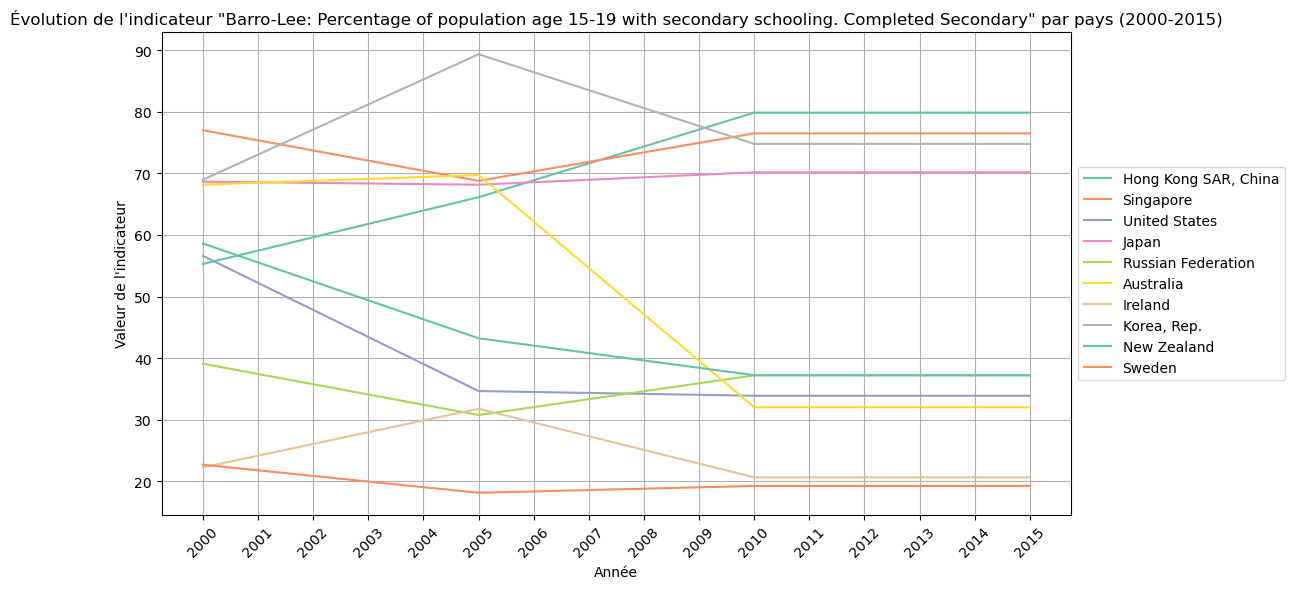

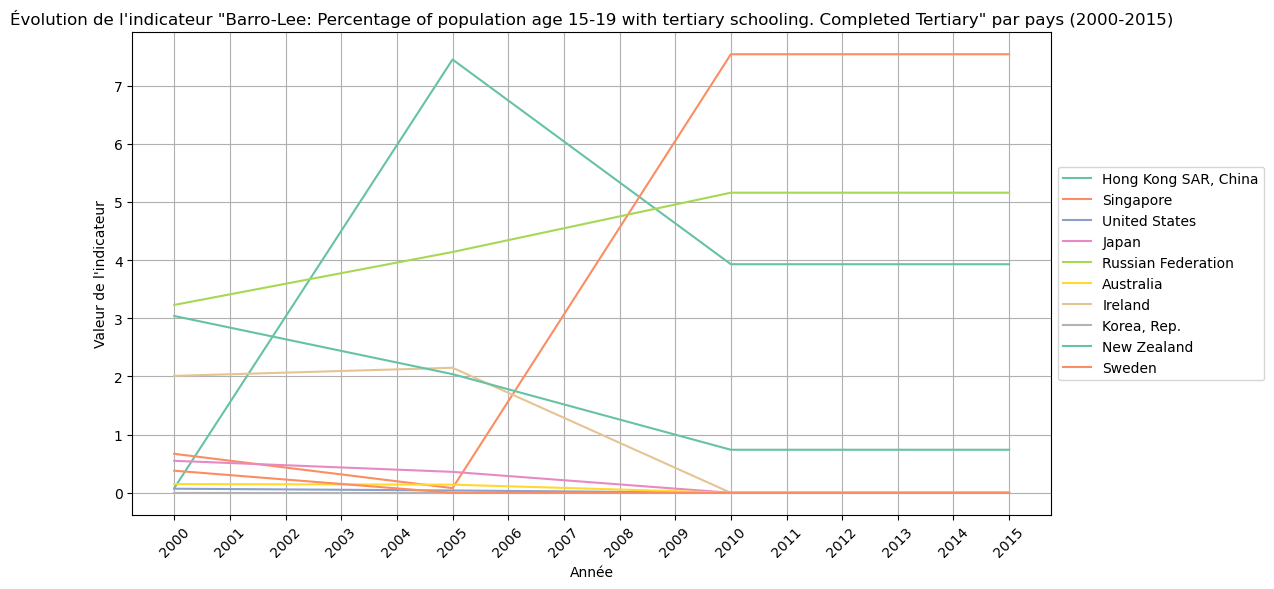

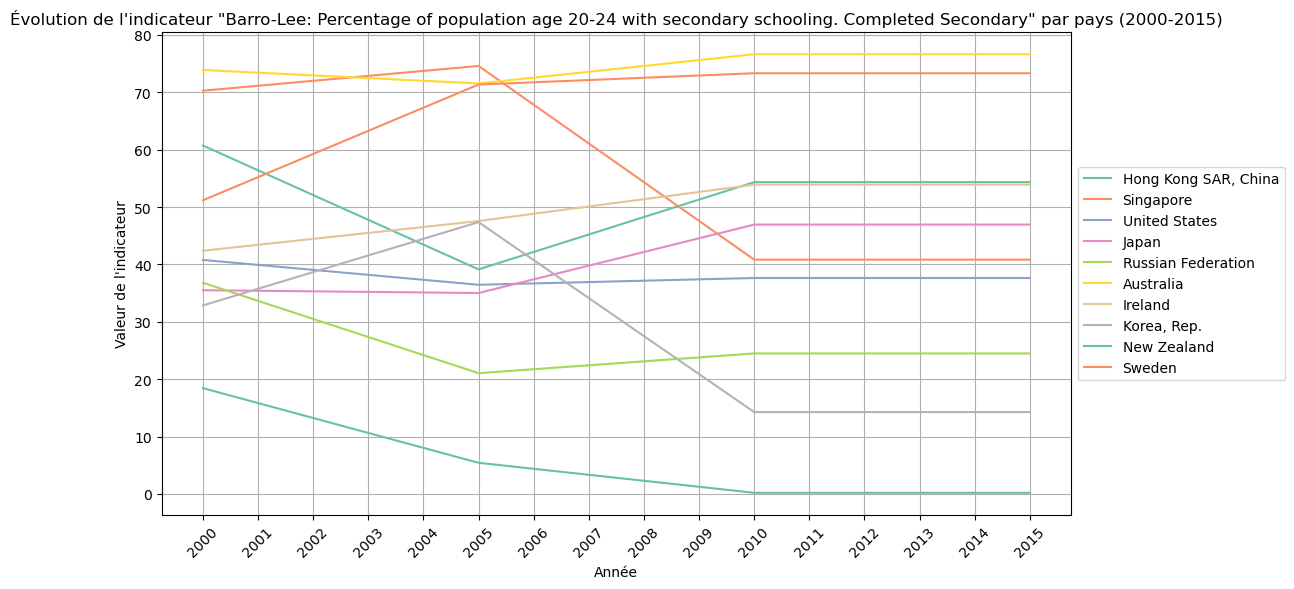

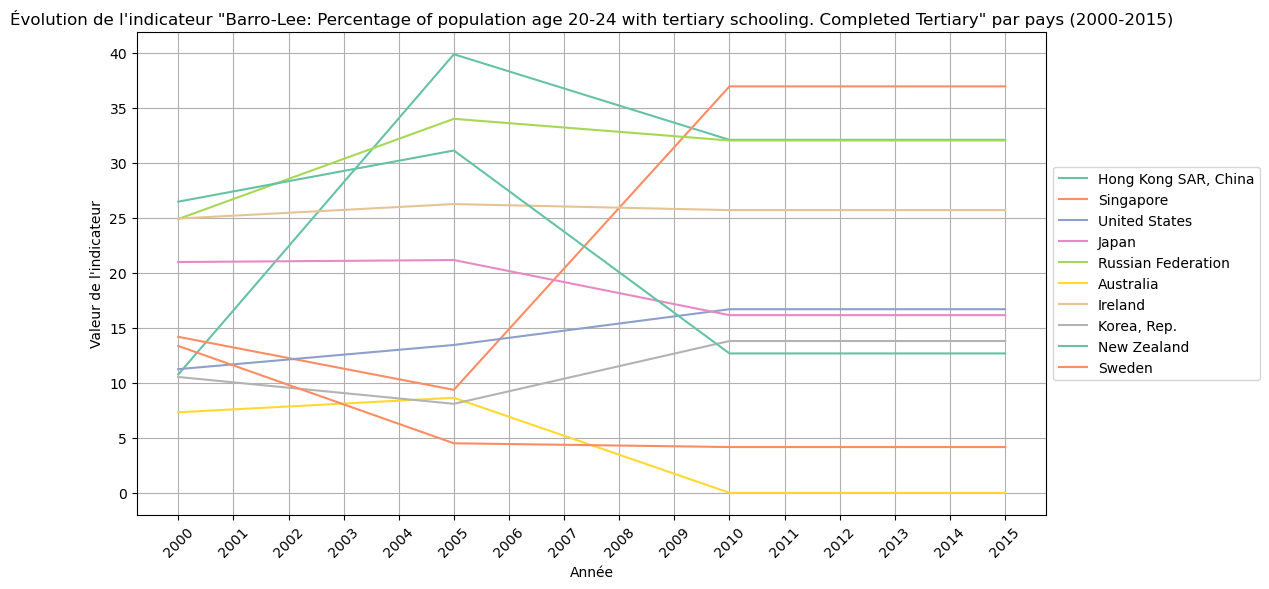

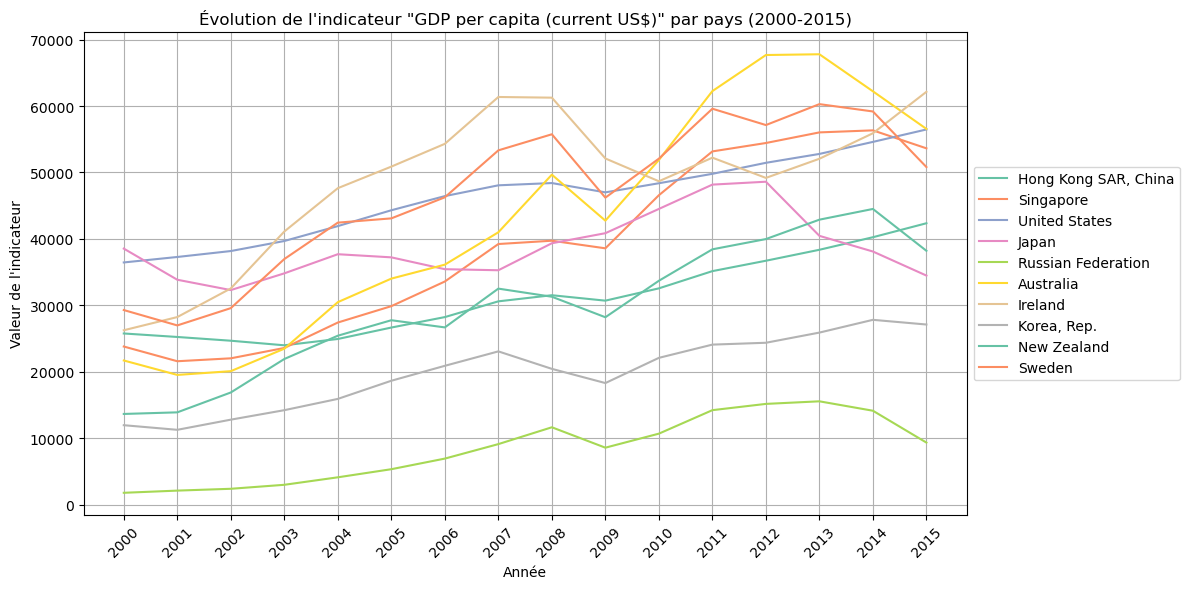

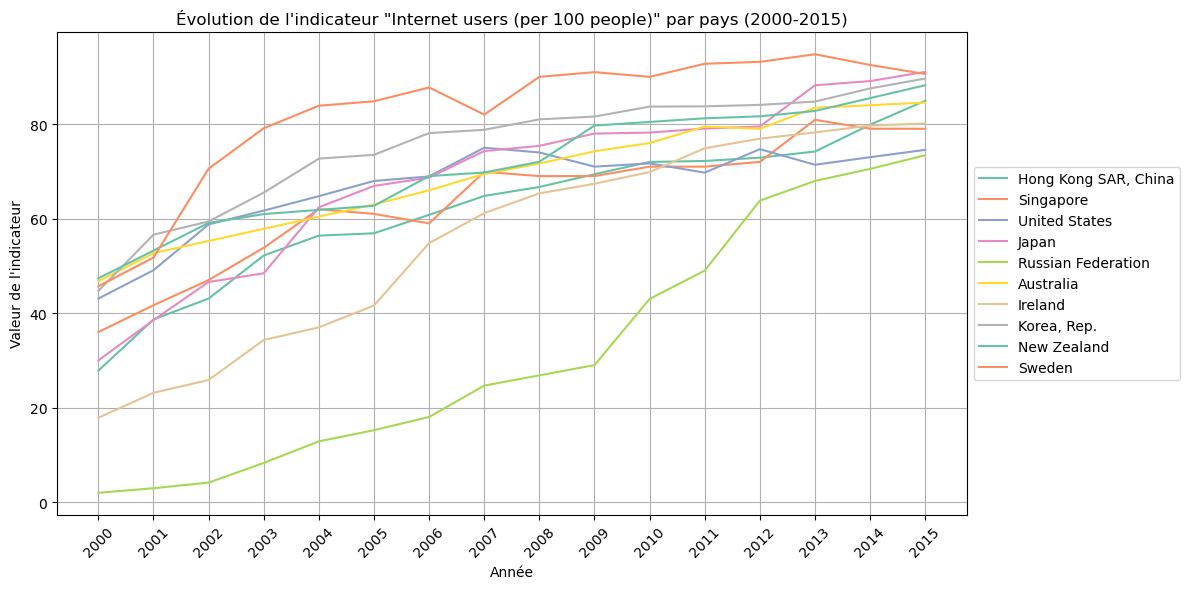

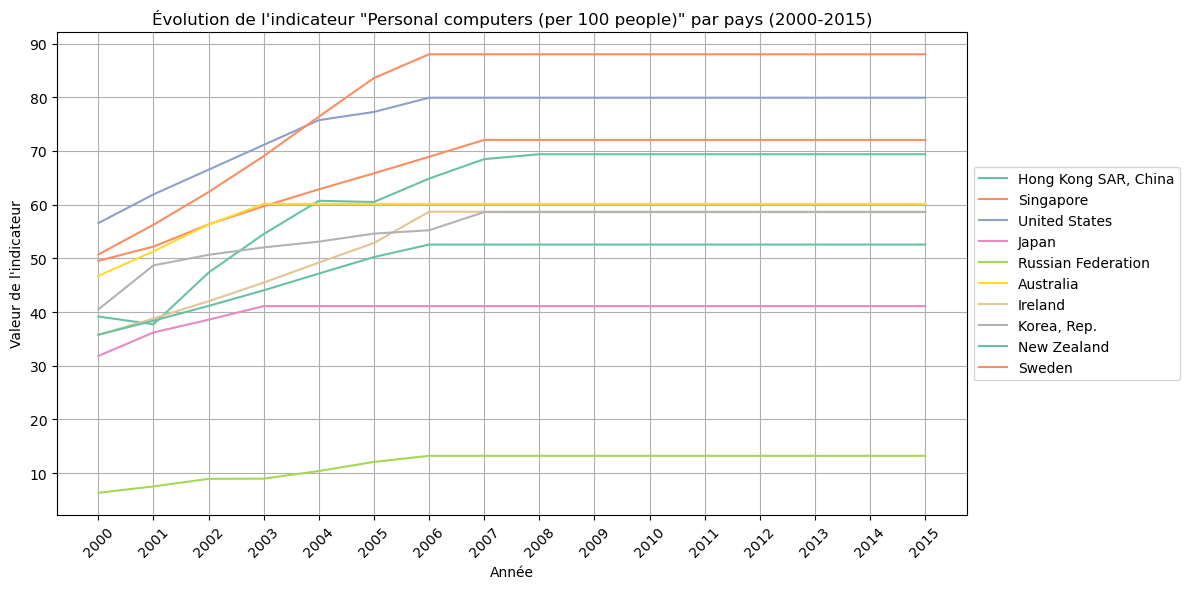

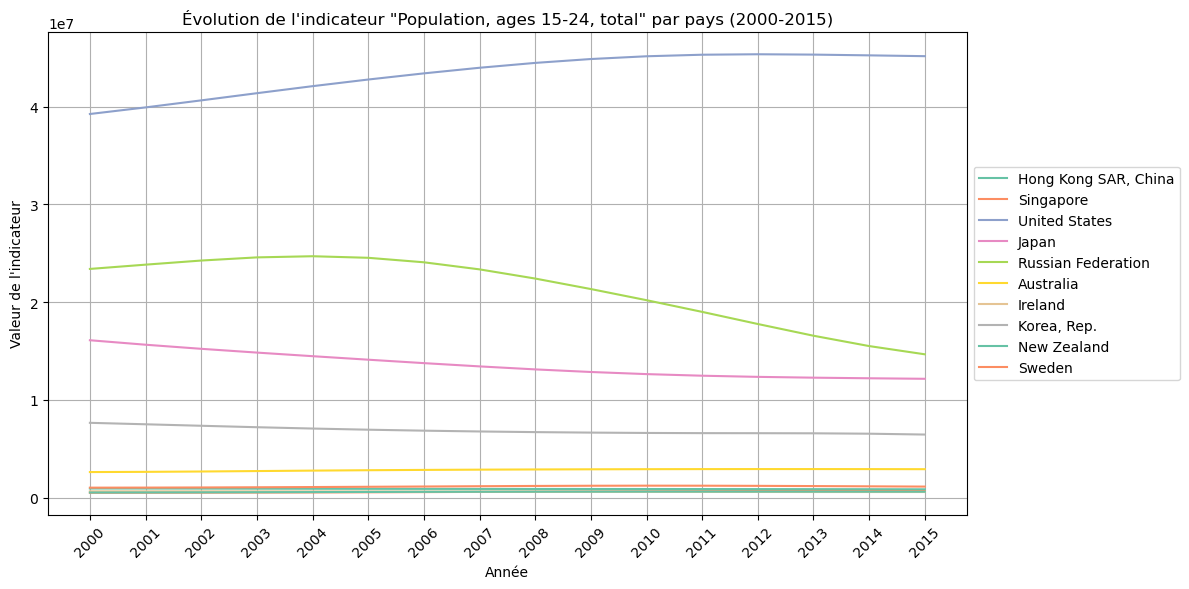

In [111]:
# Liste des noms de pays que nous souhaitons inclure dans le graphique
pays_inclus = top_countries_synthetic['country_name'].tolist()  # Remplacez par les noms de pays souhaités

# Liste des indicateurs que nous souhaitons inclure dans le graphique
indicateurs_inclus = data_edstats_final['indicator_name'].unique()  # Remplacez par les noms ou codes d'indicateurs

# Sélectionner les années de 2000 à 2015 en tant que colonnes
colonnes_annees = [str(annee) for annee in range(2000, 2016)]

# Créer un graphique distinct pour chaque indicateur avec au moins une valeur renseignée
for indicateur in indicateurs_inclus:
    plt.figure(figsize=(12, 6))
    plt.title(f'Évolution de l\'indicateur "{indicateur}" par pays (2000-2015)')
    plt.xlabel('Année')
    plt.ylabel('Valeur de l\'indicateur')
    plt.grid(True)
    
    au_moins_une_valeur_renseignee = False  # Variable pour vérifier si au moins une valeur est renseignée
    
    for pays in pays_inclus:
        donnees_pays = data_edstats_final[(data_edstats_final['country_name'] == pays) & (data_edstats_final['indicator_name'] == indicateur)]
        if not donnees_pays[colonnes_annees].isnull().all().all():
            # Effectuer une interpolation linéaire si au moins une valeur est renseignée
            donnees_pays_interpol = donnees_pays.set_index('country_name')[colonnes_annees].interpolate(method='linear', axis=1)
            plt.plot(colonnes_annees, donnees_pays_interpol.iloc[0])
            au_moins_une_valeur_renseignee = True
    
    if au_moins_une_valeur_renseignee:
        plt.legend(pays_inclus, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


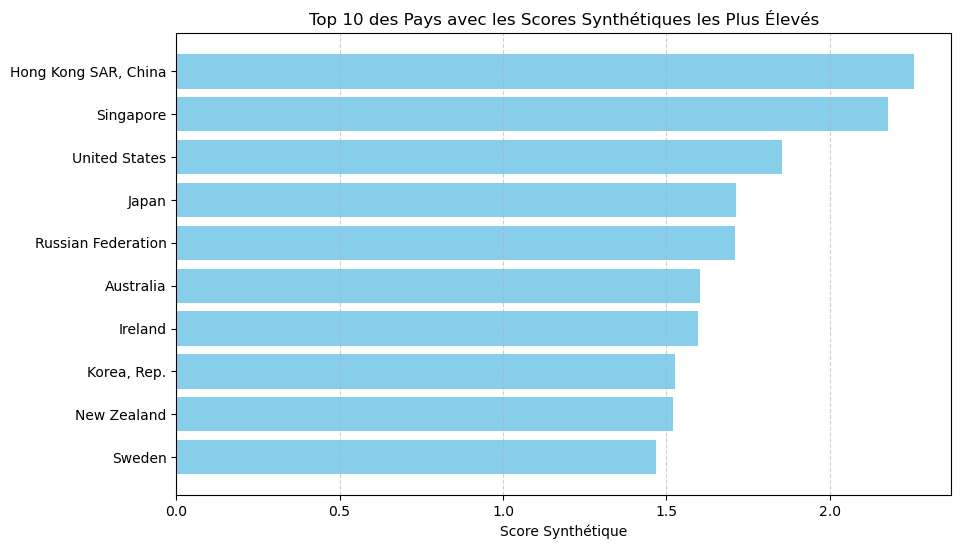

In [112]:
# Sélectionnez les 10 meilleurs pays
top_10_countries = indicators_values.nlargest(10, 'score_synthetique')

# graphique à barres horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['country_name'], top_10_countries['score_synthetique'], color='skyblue')
plt.xlabel('Score Synthétique')
plt.title('Top 10 des Pays avec les Scores Synthétiques les Plus Élevés')
plt.gca().invert_yaxis()  # Inverser l'ordre pour avoir le score le plus élevé en haut
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Affichez le graphique
plt.show()